# Group Project

### Team members:

## Project Overview 

- This project is meant to : project purpose
- In order to investigate inventory management efficiency, we analyzed the following aspects:
    1. Fuel Replenishment Frequency 
    2. Fuel Replenishemnt Quantity 
    3. Fuel Cost Evolution patterns

## Notes from the Group
The analysis flow of this document is not exactly the same as the paper's structure for several reasons:
1. The group had began the analysis process before the project instruction is altered. 
2. We wish to explore data by differnt datafiles
3. We have explored more data than what is included in the report, mainly due to the constraint of page limits

# 1. Preliminary Data Cleaning

## 1.1 Importing Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# import data
location = pd.read_csv("Locations.csv")   
Tanks = pd.read_csv("Tanks.csv")
Invoices = pd.read_csv("Invoices.csv")
fuel_1 = pd.read_csv("Fuel_Level_Part_1.csv")
fuel_2 = pd.read_csv("Fuel_Level_Part_2.csv")

`location` -- This is a data set that contains the following columns:

    - Gas Station Location: The unique ID of the gas station
    - Gas Station Name: The gas station name
    - Gas Station Address: The gas station address
    - Gas Station Latitude: The gas station latitude
    - Gas Station Longitude: The gas station longitude
    
`Tank`-- Contains information for specific tank features

    - Tank ID: A unique ID of each tank in the system
    - Tank Location: Gas station this tank is located at 
    - Tank Number: ID of each tank in a specific location
    - Tank Type: The type of fuel this tank is used for: U for regular gas, D for Diesel, and P for premium
    - Tank Capacity: Capacity of the tank in liters

`Invoices` -- Contains details when the gas location purchases fuels 
   - Invoice Date: Date of the purchase
   - Invoice ID: Unique ID of the invoice
   - Invoice Gas Station Location: Gas station location
   - Gross Purchase Cost: Total Canadian Dollar (CAD) paid for the purchase
   - Amount Purchased: Total number of fuel liters purchased
   - Fuel Type: Purchased fuel type

`fuel_1` & `fuel_2` -- Contains records whent he fuel level of each gas tank changes
   - Tank ID: ID of the tank
   - Fuel Level: The amount of remaining fuel (inventory in liters)
   - Time Stamp: The time of inventory reporting 



In [3]:
# A over view of all the data structures
display(location.head())
display(Tanks.head())
display(Invoices.head())
display(fuel_1.head())
display(fuel_2.head())

,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude
0,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
1,2,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",43.230700,-79.763930
2,3,Central,"80 Park St N, Hamilton, ON L8R 2M9, Canada",43.260260,-79.870580
3,4,Chedoke,"16 McMaster Ave, Dundas, ON L9H 0A8, Canada",43.261849,-79.937057
4,5,Mountain View,"985 Scenic Dr, Hamilton, ON L9C 1H7, Canada",43.244910,-79.921850


,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity
0,T 10,1,1,U,40000
1,T 11,1,2,U,40000
2,T 12,1,3,D,40000
3,T 13,1,4,P,40000
4,T 14,1,5,U,40000


,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type
0,1/2/2017,10000.0,1,7570.820,6609.600,G
1,1/2/2017,10001.0,1,12491.853,9338.736,D
2,1/2/2017,10002.0,1,NaN,NaN,NaN
3,1/2/2017,10002.0,2,17034.345,13377.824,D
4,1/2/2017,NaN,2,NaN,NaN,NaN


,Tank ID,Fuel Level,Time stamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55


,Tank ID,Fuel_Level,Timestamp
0,T 32,22327,1/1/2017 0:05
1,T 20,25215,1/1/2017 0:07
2,T 10,25700,1/1/2017 0:09
3,T 11,25685,1/1/2017 0:10
4,T 14,27138,1/1/2017 0:10


## 1.2 Check for null or missing values 

In [4]:
# Checking for missing values in each data set 

missing = {'Location': location.isnull().sum(),
           'Tanks': Tanks.isnull().sum(),
           'Invoices': Invoices.isnull().sum(),
           'Fuel_1': fuel_1.isnull().sum(),
           'Fuel_2': fuel_2.isnull().sum()}
missing

{'Location': Gas Station Location     0
 Gas Station Name         0
 Gas Station Address      0
 Gas Station Latitude     0
 Gas Station Longitude    0
 dtype: int64,
 'Tanks': Tank ID          0
 Tank Location    0
 Tank Number      0
 Tank Type        0
 Tank Capacity    0
 dtype: int64,
 'Invoices': Invoice Date                     0
 Invoice ID                      41
 Invoice Gas Station Location     0
 Gross Purchase Cost             42
 Amount Purchased                42
 Fuel Type                       42
 dtype: int64,
 'Fuel_1': Tank ID       0
 Fuel Level    2
 Time stamp    0
 dtype: int64,
 'Fuel_2': Tank ID       0
 Fuel_Level    0
 Timestamp     0
 dtype: int64}

- We observe that only Invoice data and Fuel_1 data have some missing data, since it is significantly smaller than the sample size, we decied to drop null values 


In [5]:
# Checking for any null data remaining after dropping 
Invoices.dropna(inplace=True)
fuel_1.dropna(inplace=True)

missing_2 = {'Location': location.isnull().sum(),
             'Tanks': Tanks.isnull().sum(),
             'Invoices': Invoices.isnull().sum(),
             'Fuel_1': fuel_1.isnull().sum(),
             'Fuel_2': fuel_2.isnull().sum()}
missing_2

{'Location': Gas Station Location     0
 Gas Station Name         0
 Gas Station Address      0
 Gas Station Latitude     0
 Gas Station Longitude    0
 dtype: int64,
 'Tanks': Tank ID          0
 Tank Location    0
 Tank Number      0
 Tank Type        0
 Tank Capacity    0
 dtype: int64,
 'Invoices': Invoice Date                    0
 Invoice ID                      0
 Invoice Gas Station Location    0
 Gross Purchase Cost             0
 Amount Purchased                0
 Fuel Type                       0
 dtype: int64,
 'Fuel_1': Tank ID       0
 Fuel Level    0
 Time stamp    0
 dtype: int64,
 'Fuel_2': Tank ID       0
 Fuel_Level    0
 Timestamp     0
 dtype: int64}

## 1.3 Checking for duplicates

In [6]:
duplicate = {'Location': location.duplicated().sum(),
             'Tanks': Tanks.duplicated().sum(),
             'Invoices': Invoices.duplicated().sum(),
             'Fuel_1': fuel_1.duplicated().sum(),
             'Fuel_2': fuel_2.duplicated().sum()}
duplicate

{'Location': 0, 'Tanks': 0, 'Invoices': 0, 'Fuel_1': 25, 'Fuel_2': 46}

- We wish to drop duplicates for fuel_1 and fuel_2. 
- But first, we notice the column names for fuel_1 and fuel_2 are not uniform. So we will change the column names to be the same, the proceed to cleaning duplicates


In [7]:
# Renaming columns in Fuel_Level_Part_1 and Fuel_Level_Part_2 as per the user's request
fuel_1.rename(columns={'Tank ID': 'Tank_ID', 'Fuel Level': 'Fuel_Level', 'Time stamp':'Time'}, inplace=True)
fuel_2.rename(columns={'Tank ID': 'Tank_ID', 'Timestamp': 'Time'}, inplace=True)
# Confirming the changes 
fuel_1.columns, fuel_2.columns

(Index(['Tank_ID', 'Fuel_Level', 'Time'], dtype='object'),
 Index(['Tank_ID', 'Fuel_Level', 'Time'], dtype='object'))

In [8]:
# Let's see what the duplicate entries look like 
duplicates_fuel_1 = fuel_1[fuel_1.duplicated(keep=False)].sort_values(by=['Tank_ID', 'Time'])
duplicates_fuel_2 = fuel_2[fuel_2.duplicated(keep=False)].sort_values(by=['Tank_ID', 'Time'])

# Displaying first few rows of the duplicate records for better understanding
duplicates_fuel_1.head(), duplicates_fuel_2.head()

(      Tank_ID  Fuel_Level             Time
 68985    T 12     31238.0   2/11/2019 9:59
 68986    T 12     31238.0   2/11/2019 9:59
 69391    T 12     32775.0  2/15/2019 13:59
 69392    T 12     32775.0  2/15/2019 13:59
 69600    T 12     24655.0  2/17/2019 17:59,
        Tank_ID  Fuel_Level             Time
 627878    T 10       18841  10/4/2018 22:42
 627879    T 10       18841  10/4/2018 22:42
 630988    T 10       24386  10/7/2018 22:42
 630989    T 10       24386  10/7/2018 22:42
 630126    T 10       26703   10/7/2018 2:42)

In [9]:
# Removing duplicate rows from fuel_1 and fuel_2
fuel_1.drop_duplicates(inplace=True)
fuel_2.drop_duplicates(inplace=True)

# Re-checking for duplicates to confirm the changes
duplicates_after_removal = {
    'Fuel_1': fuel_1.duplicated().sum(),
    'Fuel_2': fuel_2.duplicated().sum()}

duplicates_after_removal

{'Fuel_1': 0, 'Fuel_2': 0}

## 1.4 Normalize Data

In [10]:
# Checking the current data types of each dataset

data_types = {
    'Locations': location.dtypes,
    'Tanks': Tanks.dtypes,
    'Invoices': Invoices.dtypes,
    'Fuel_Level_Part_1': fuel_1.dtypes,
    'Fuel_Level_Part_2': fuel_2.dtypes
}

data_types

{'Locations': Gas Station Location       int64
 Gas Station Name          object
 Gas Station Address       object
 Gas Station Latitude     float64
 Gas Station Longitude    float64
 dtype: object,
 'Tanks': Tank ID          object
 Tank Location     int64
 Tank Number       int64
 Tank Type        object
 Tank Capacity     int64
 dtype: object,
 'Invoices': Invoice Date                     object
 Invoice ID                      float64
 Invoice Gas Station Location      int64
 Gross Purchase Cost             float64
 Amount Purchased                float64
 Fuel Type                        object
 dtype: object,
 'Fuel_Level_Part_1': Tank_ID        object
 Fuel_Level    float64
 Time           object
 dtype: object,
 'Fuel_Level_Part_2': Tank_ID       object
 Fuel_Level     int64
 Time          object
 dtype: object}

- Invoices:
    - 'Invoice Date' should be converted to a datetime format.
    - 'Invoice ID' : we  want to convert it to an integer or string for easier handling.
- Fuel_1 & fuel_2:
    - 'Time stamp' and 'Timestamp' should be converted to datetime formats. 

In [11]:
# Converting 'Invoice Date' to datetime format in Invoices dataset
Invoices['Invoice Date'] = pd.to_datetime(Invoices['Invoice Date'])

# Converting 'Invoice ID' to integer in Invoices dataset
Invoices['Invoice ID'] = Invoices['Invoice ID'].astype(int)

# Converting 'Time stamp' and 'Timestamp' to datetime format in Fuel_Level datasets
fuel_1['Time'] = pd.to_datetime(fuel_1['Time'])
fuel_2['Time'] = pd.to_datetime(fuel_2['Time'])

# Re-checking the data types to confirm the changes
data_types_after_conversion = {
    'Invoices': Invoices.dtypes,
    'Fuel_Level_Part_1': fuel_1.dtypes,
    'Fuel_Level_Part_2': fuel_2.dtypes
}

data_types_after_conversion

{'Invoices': Invoice Date                    datetime64[ns]
 Invoice ID                               int64
 Invoice Gas Station Location             int64
 Gross Purchase Cost                    float64
 Amount Purchased                       float64
 Fuel Type                               object
 dtype: object,
 'Fuel_Level_Part_1': Tank_ID               object
 Fuel_Level           float64
 Time          datetime64[ns]
 dtype: object,
 'Fuel_Level_Part_2': Tank_ID               object
 Fuel_Level             int64
 Time          datetime64[ns]
 dtype: object}

In [12]:
# We want to redefine invoice after we clean to data and sort the information 
clean_Invoice = Invoices
clean_Invoice = clean_Invoice.sort_values(by=['Invoice Gas Station Location'])
clean_Invoice = clean_Invoice.set_index(['Invoice Gas Station Location','Invoice Date'])
clean_Invoice['Gas_Unit_Price'] = clean_Invoice['Gross Purchase Cost'] / clean_Invoice['Amount Purchased']
clean_Invoice

Invoice ID  Gross Purchase Cost  \
Invoice Gas Station Location Invoice Date                                    
1                            2017-01-02         10000           7570.82000   
                             2018-06-06         11592           9463.52500   
                             2018-06-05         11591          32179.77041   
                             2018-06-04         11586          11356.23000   
                             2018-06-04         11585           3406.86900   
...                                               ...                  ...   
8                            2019-07-30         12795           5678.11500   
                             2019-07-31         12797           7760.09050   
                             2018-09-18         11904          11382.72787   
                             2017-12-20         11093          15145.42541   
                             2018-11-01         12046           7597.31787   

                                           Amount Purchased Fuel Type  \
Invoice Gas Station Location Invoice Date                               
1                            2017-01-02            6609.600         G   
                             2018-06-06            8926.000         D   
                             2018-06-05           30122.096         G   
                             2018-06-04           10711.200         D   
                             2018-06-04            3213.360         D   
...                                                     ...       ...   
8                            2019-07-30            3158.640         D   
                             2019-07-31            5387.728         G   
                             2018-09-18           11212.512         G   
                             2017-12-20           14554.032         G   
                             2018-11-01            7230.016         D   

                                           Gas_Unit_Price  
Invoice Gas Station Location Invoice Date                  
1                            2017-01-02          1.145428  
                             2018-06-06          1.060220  
                             2018-06-05          1.068311  
                             2018-06-04          1.060220  
                             2018-06-04          1.060220  
...                                                   ...  
8                            2019-07-30          1.797646  
                             2019-07-31          1.440327  
                             2018-09-18          1.015181  
                             2017-12-20          1.040634  
                             2018-11-01          1.050802  

[2831 rows x 5 columns]

# 2 Data Exploration

## 2.1 Let's first explore Fuel Level data

In [13]:
f1_data = fuel_1.sort_values(by = ['Tank_ID', 'Time'])
f2_data = fuel_2.sort_values(by = ['Tank_ID', 'Time'])

In [14]:
# check if the two data set have overlap Tank data
np.isin(f1_data.Tank_ID.unique(),f2_data.Tank_ID.unique())

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [15]:
# Since the two data files contains data for differnt tanks, we can concat the two data frame to obtain one big data frame for all tanks data
fuel_merge = pd.concat([f1_data,f2_data])
fuel_merge = fuel_merge.sort_values(by=['Tank_ID','Time'])

In [16]:
# we are curious about the percentage change of fuel level for each time entry for each tank, this will help us understand the replenishment pattern later
fuel_merge['Fuel_pct_change'] = fuel_merge.groupby('Tank_ID')['Fuel_Level'].pct_change()

In [17]:
fuel_merge.isnull().sum()

Tank_ID             0
Fuel_Level          0
Time                0
Fuel_pct_change    23
dtype: int64

** The Null values here for percentage change is because there is no percentage change for first entry for each tank 

In [18]:
# To reduce null values from interfering our data, we decided to drop the null values. This should not alter our data too much becuse it is a very small portion of all the fuel level data
fuel_merge = fuel_merge.dropna()

### 2.1.1 Analyzing Replenishement Frequcny & Quantity 

#### Approch 
- For Replenishemnt Frequency: When fuel level percentages > 0, the gas station has put in additional gas into the tank, which will count as 1 occurance of replenishment
- For Replenishment Quantity: 
    - first calculate quantitative changes in fuel level changes for each time entry for each tank 
    - Then fill in all the negative replenishment quantity (where there is no replenishment) with a value of 0
    - When replenishemnt quantity is positive is when we have replenishment occurance 

In [19]:
## calculate replenishment occurances. When fuel level percentages > 0, the gas station has put in additional gas into the tank, which will count as 1 occurance of replenishment
fuel_merge['Replenishment'] = (fuel_merge['Fuel_pct_change']>0).astype(int)

# We are also curuoius to analyzing the Replenishment quantity 
fuel_merge['Rep_Quantity'] = fuel_merge.groupby('Tank_ID')['Fuel_Level'].diff()
fuel_merge

,Tank_ID,Fuel_Level,Time,Fuel_pct_change,Replenishment,Rep_Quantity
13,T 10,25666.0,2017-01-01 00:24:00,-0.001323,0,NaN
23,T 10,25624.0,2017-01-01 00:39:00,-0.001636,0,-42.0
34,T 10,25560.0,2017-01-01 00:54:00,-0.002498,0,-64.0
45,T 10,25560.0,2017-01-01 01:09:00,0.000000,0,0.0
57,T 10,25526.0,2017-01-01 01:25:00,-0.001330,0,-34.0
...,...,...,...,...,...,...
974468,T 32,27619.0,2019-08-15 22:53:00,0.000000,0,0.0
974477,T 32,27619.0,2019-08-15 23:08:00,0.000000,0,0.0
974486,T 32,27619.0,2019-08-15 23:23:00,0.000000,0,0.0
974495,T 32,27619.0,2019-08-15 23:38:00,0.000000,0,0.0


In [20]:
# Check whether there is a positive replenishment quantity for every Replenishment Occurance 
any(fuel_merge[fuel_merge['Replenishment'].eq(1)]['Rep_Quantity'] <= 0)

False

In [21]:
# Fill all the negetive fuel level changes with values of zeros, so we only see positive replenishment quantity (i.e. when replenishment actually happended)
fuel_merge['Rep_Quantity'] = [0 if x <=0 else x for x in fuel_merge['Rep_Quantity']]
fuel_merge

,Tank_ID,Fuel_Level,Time,Fuel_pct_change,Replenishment,Rep_Quantity
13,T 10,25666.0,2017-01-01 00:24:00,-0.001323,0,NaN
23,T 10,25624.0,2017-01-01 00:39:00,-0.001636,0,0.0
34,T 10,25560.0,2017-01-01 00:54:00,-0.002498,0,0.0
45,T 10,25560.0,2017-01-01 01:09:00,0.000000,0,0.0
57,T 10,25526.0,2017-01-01 01:25:00,-0.001330,0,0.0
...,...,...,...,...,...,...
974468,T 32,27619.0,2019-08-15 22:53:00,0.000000,0,0.0
974477,T 32,27619.0,2019-08-15 23:08:00,0.000000,0,0.0
974486,T 32,27619.0,2019-08-15 23:23:00,0.000000,0,0.0
974495,T 32,27619.0,2019-08-15 23:38:00,0.000000,0,0.0


#### Insight 1. Monthly Replenishment Frequency & Quantity 

In [22]:
# we are also curious about the replenishment frequency and average replenishment quantity of each Tank.
monthly_rep_freq = fuel_merge.groupby('Tank_ID')['Replenishment'].sum()/33
#display(monthly_rep_freq)
avg_rep_quantity = fuel_merge[fuel_merge['Replenishment'].eq(1)].groupby('Tank_ID')['Rep_Quantity'].mean()
# display(avg_rep_quantity)

In [23]:
# We could now interate the replenishment Quantity to the dataframe of Tank to get a more direct understanding of the comparison of replenishment quantity and frequency of each tank
Tanks['monthly_rep_freq'] = monthly_rep_freq.values
Tanks['Avg_rep_Amount'] = avg_rep_quantity.values
# display(Tanks)

# Compare the replenishment frequency and quantity of each gas location 
Tanks.groupby('Tank Location')[['monthly_rep_freq','Avg_rep_Amount']].agg(['mean','std']).T

Tank Location                    1           2           3            4  \
monthly_rep_freq mean   101.828283   74.590909   36.954545    48.257576   
                 std     58.676053   20.320865    4.521198     1.949901   
Avg_rep_Amount   mean  1027.177695  720.869091  304.137338  1114.247199   
                 std    436.196029  267.418487   66.112587   130.920874   

Tank Location                   5           6          7          8  
monthly_rep_freq mean   57.348485   35.131313  35.287879  89.363636  
                 std     2.121320    5.097428   0.449977   9.385235  
Avg_rep_Amount   mean  630.437978  131.410380  46.080142  53.760622  
                 std   139.025092   82.004261  48.377138  31.548100

In [24]:
agg_stats = Tanks.groupby('Tank Location')[['monthly_rep_freq','Avg_rep_Amount']].agg(['mean','std']).reset_index()

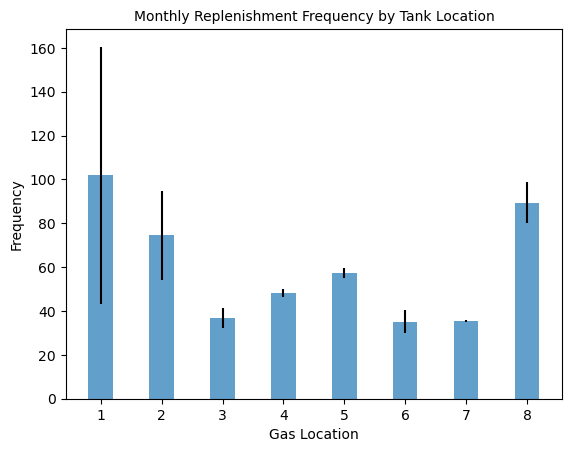

In [25]:
# Monthly Replenishment Frequency by Gas Location
plt.figure()
plt.bar(agg_stats['Tank Location'], agg_stats[('monthly_rep_freq', 'mean')], width=0.4, 
        yerr=agg_stats[('monthly_rep_freq', 'std')], alpha=0.7)
plt.xticks(agg_stats['Tank Location'])
plt.title('Monthly Replenishment Frequency by Tank Location', fontsize=10)
plt.ylabel('Frequency')
plt.xlabel('Gas Location')
plt.show()

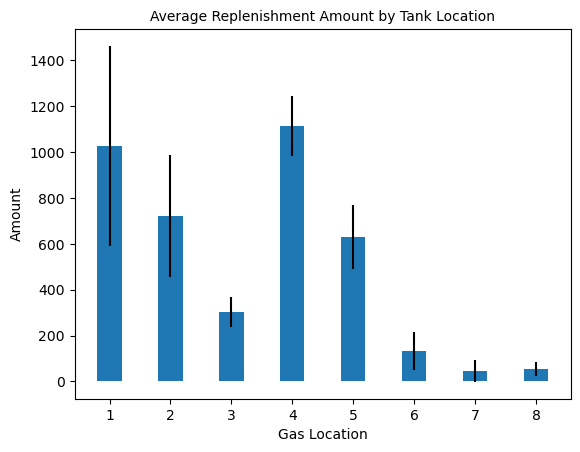

In [26]:
# Monthly Replenishment Quantity by Gas Location
plt.figure()
plt.bar(agg_stats['Tank Location'],agg_stats[('Avg_rep_Amount', 'mean')], width=0.4, 
        yerr=agg_stats[('Avg_rep_Amount', 'std')])
plt.xticks(agg_stats['Tank Location'])
plt.title('Average Replenishment Amount by Tank Location', fontsize=10)
plt.ylabel('Amount')
plt.xlabel('Gas Location')
plt.show()

Interpretation:
- Monthly Replenishment Quantity: We could see that the Location 1 generally have the highest monthly replenishment frequency, and also the highest average replenishemnt amount.
- Comparetivley, Location 6 and 7 have the lowest replenishemnt frequency. 

- Location 7 & 8 seems to have the lowest average replenishment quantity. Location 1 & 2 have the highest replenshiment frequency.

- We may be able to describe different location's characteritics by assigning level of replenishment frequency & quantity:
    - 1:[high, high] 
    - 2:[median, high]
    - 3:[low, low]
    - 4:[low, median]
    - 5:[low,median]
    - 6:[low, low]
    - 7:[low,low]
    - 8:[median,low]

#### Insight 2. Replenishment decisions: Remaining Fuel as a percentage of tank capacity

In [27]:
# We are also curious to see when does the location decides to replenish its tanks; we will analyze this by observing when the fuel level is to what percentage of the tank capacity does the location decides to replenish
fuel_merge = pd.merge(fuel_merge, Tanks[['Tank ID','Tank Location','Tank Capacity','Tank Type']], left_on='Tank_ID', right_on='Tank ID', how='left')
fuel_merge['Fuel_Level_Capacity_pct'] = fuel_merge['Fuel_Level'] / fuel_merge['Tank Capacity']

In [28]:
fuel_merge_shifted = fuel_merge.shift(1)
rows_before_replenish = fuel_merge_shifted[fuel_merge['Replenishment'].eq(1)]
replen_level=rows_before_replenish.groupby('Tank Location')['Fuel_Level_Capacity_pct'].agg(['mean','std'])
replen_level=replen_level.reset_index()

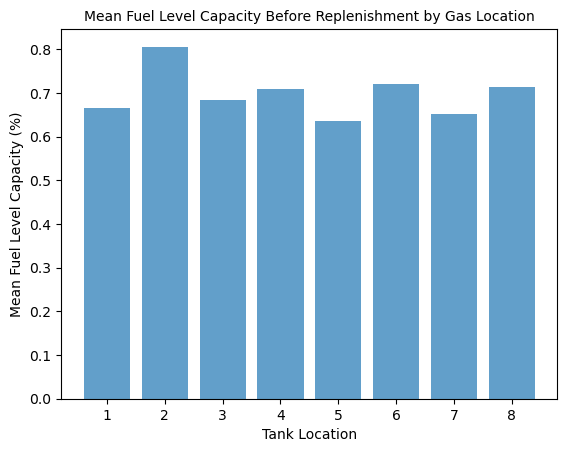

In [29]:

plt.figure()
plt.bar(replen_level['Tank Location'], replen_level['mean'], alpha=0.7)
plt.xlabel('Tank Location')
plt.ylabel('Mean Fuel Level Capacity (%)')
plt.title('Mean Fuel Level Capacity Before Replenishment by Gas Location', fontsize=10)

plt.show()

Intepretation:
- By doing so, we obtain the average percentages of the remaining fuel to its capacity. We observe:
- In general, gas locations would not allow the fuel level to drop below 60% of its tanks capacity before replenishing gas 
- Amongst tanks, Location 2, 4, 6, 8 seems to maintain a higher level of inventory compare to location 1, 3, 5, 7

#### Insight 3: Fuel Consumption of Each location 

In [30]:
# Calculate the difference in Fuel_Level (Consumption)

fuel_merge['Fuel_Consumption'] = fuel_merge['Fuel_Level'].diff().fillna(0)

# Convert the differences into positive values, as it represents decrease
fuel_merge['Fuel_Consumption'] = fuel_merge['Fuel_Consumption'].apply(lambda x: -x if x < 0 else 0)


fuel_merge.groupby('Tank Location')['Fuel_Consumption'].agg(['mean','std']).T

Tank Location,1,2,3,4,5,6,7,8
mean,34.976185,19.214608,5.725357,21.150615,16.712033,1.870778,0.922415,2.001207
std,97.619507,82.744660,104.734187,70.664160,79.278412,21.572582,57.919277,39.296540


Interpretation:

    - We could observe that in general, location 1 and 2 have the highest level of consumption. This may mean that location 1 and 2 have the highest customer flows. 
    - This explain why locaiton 1 and 2 have high level of replenishnment frequency and quantity, as they consume inventory much faster than other locations
    
    - Location 3, 6, 7, 8 have the lowest level of consumption, which correspond to their relatively lower replenishment frequency and quantity 
    - Location 4,5 falls in the middle range, which is shown in its lower level of replenishment but relatively higher level of replenishment quantity

In [31]:
# We will later execute regression, so we wish to drop any null value due to percentages calculations.
# This should not be a probelm as we have a very large sample size. There are only around 23 null values (23 tanks) for the first entry to each tank.
fuel_merge = fuel_merge.dropna()
fuel_merge.isnull().sum()

Tank_ID                    0
Fuel_Level                 0
Time                       0
Fuel_pct_change            0
Replenishment              0
Rep_Quantity               0
Tank ID                    0
Tank Location              0
Tank Capacity              0
Tank Type                  0
Fuel_Level_Capacity_pct    0
Fuel_Consumption           0
dtype: int64

#### Insignt 4: Fuel Level Evolution Trajectory
- In this section we will explore how each tank / location's fuel level evolve over time; this may help us better understand their choice of inventory management and also could help us make suggestions later 


In [32]:
# fuel_merge.groupby('Tank_ID')['Fuel_Level'].describe()
fuel_merge.groupby('Tank Location')['Fuel_Level'].describe()

,count,mean,std,min,25%,50%,75%,max
Tank Location,,,,,,,,
1,502491.0,23781.066823,8807.262653,2567.0,20215.0,26616.0,30341.0,37824.0
2,348999.0,44440.746484,16416.769175,11822.0,28785.0,37310.0,60480.0,69531.0
3,136069.0,20278.427195,3863.404267,8548.0,17251.0,20650.0,23531.0,29228.0
4,167365.0,28384.909222,3671.544991,14169.0,25707.0,28531.0,31295.0,38718.0
5,144612.0,16280.509356,3162.301376,4736.0,14101.0,16581.0,18856.0,23058.0
6,257740.0,21801.006029,3755.516367,5194.0,19193.0,22202.0,24829.0,28785.0
7,139884.0,3278.571559,716.559766,1484.0,2814.0,3361.0,3838.0,4613.0
8,162381.0,26058.134462,6556.091928,5811.0,22694.0,27570.0,31272.0,35875.0


Interpretation:
- We could see that although Location 1 has the most tanks, its average fuel level is not the highest.
- Location 2 have the highest number of fuels in general, which minimizes its risks of running out of fuels 
- Location 2 also have the largest std, which means that its fuel level in general changes  pretty prequently 

In [33]:
import seaborn as sns

In [34]:
# !!! This is commented out because there is no obvious relationship ！！！

# for tank_location, group_data in fuel_merge.groupby('Tank Location'):
#     plt.figure()
#     sns.lineplot(data=group_data, x='Time', y='Fuel_Level', hue='Tank_ID', legend='full')
#     plt.title(f'Tank Location: {tank_location}')
#     plt.xlabel('Time')
#     plt.ylabel('Fuel Level')
#     plt.show()

In [35]:
# palette = sns.color_palette("husl", 8)

# # Loop through each tank location
# for tank_location, location_data in fuel_merge.groupby('Tank Location'):
    
#     # Determine the number of unique tanks at this location
#     num_tanks = location_data['Tank_ID'].nunique()
    
#     # Create subplots
#     fig, axs = plt.subplots(num_tanks, 2, figsize=(20, 6 * num_tanks))
    
#     # Check if there's only one tank (to handle subplot indexing)
#     single_tank = num_tanks == 1
    
#     # Loop through each tank at this location
#     for i, (tank_id, tank_data) in enumerate(location_data.groupby('Tank_ID')):
        
#         # Choose the axis based on whether we have a single tank or multiple
#         ax_row = axs[i] if not single_tank else axs
        
#         # Plot Fuel Level
#         sns.lineplot(ax=ax_row[0], data=tank_data, x='Time', y='Fuel_Level', color=palette[i])
#         ax_row[0].set_title(f'Tank ID: {tank_id} - Fuel Level')
#         ax_row[0].set_xlabel('Time')
#         ax_row[0].set_ylabel('Fuel Level')
        
#         # Plot Fuel Consumption
#         sns.lineplot(ax=ax_row[1], data=tank_data, x='Time', y='Fuel_Consumption', color=palette[i])
#         ax_row[1].set_title(f'Tank ID: {tank_id} - Fuel Consumption')
#         ax_row[1].set_xlabel('Time')
#         ax_row[1].set_ylabel('Fuel Consumption')
    
#     # Add a super title for the entire figure (all subplots)
#     plt.suptitle(f'Tank Location: {tank_location}', fontsize=16)
    
#     # Show the plot
#     plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to make room for the suptitle
#     plt.show()

In [36]:
# Calculate basic statistics
fuel_merge.groupby('Tank Location')[['Fuel_Level','Fuel_Consumption']].describe()

Fuel_Level                                                \
                   count          mean           std      min      25%   
Tank Location                                                            
1               502491.0  23781.066823   8807.262653   2567.0  20215.0   
2               348999.0  44440.746484  16416.769175  11822.0  28785.0   
3               136069.0  20278.427195   3863.404267   8548.0  17251.0   
4               167365.0  28384.909222   3671.544991  14169.0  25707.0   
5               144612.0  16280.509356   3162.301376   4736.0  14101.0   
6               257740.0  21801.006029   3755.516367   5194.0  19193.0   
7               139884.0   3278.571559    716.559766   1484.0   2814.0   
8               162381.0  26058.134462   6556.091928   5811.0  22694.0   

                                         Fuel_Consumption             \
                   50%      75%      max            count       mean   
Tank Location                                                          
1              26616.0  30341.0  37824.0         502491.0  34.931040   
2              37310.0  60480.0  69531.0         348999.0  19.087762   
3              20650.0  23531.0  29228.0         136069.0   5.431222   
4              28531.0  31295.0  38718.0         167365.0  21.086117   
5              16581.0  18856.0  23058.0         144612.0  16.542064   
6              22202.0  24829.0  28785.0         257740.0   1.853837   
7               3361.0   3838.0   4613.0         139884.0   0.768694   
8              27570.0  31272.0  35875.0         162381.0   1.930762   

                                                        
                     std  min  25%  50%   75%      max  
Tank Location                                           
1              92.139489  0.0  0.0  0.0  53.0  19102.0  
2              48.912050  0.0  0.0  0.0   0.0   3092.0  
3              45.589674  0.0  0.0  0.0   0.0   6814.0  
4              65.532474  0.0  0.0  0.0   0.0   7590.0  
5              54.646584  0.0  0.0  0.0   0.0   9975.0  
6              19.780876  0.0  0.0  0.0   0.0   7154.0  
7               6.990427  0.0  0.0  0.0   0.0    206.0  
8              27.168367  0.0  0.0  0.0   0.0   9403.0

# 3. Explore Invoice Data

## 3.1. Analyzing Inventory Replenishment Patterns

### 3.1.1 Frequency of Replenishment
We'll start by calculating the average number of days between fuel deliveries for each gas station.

In [37]:
clean_Invoice.reset_index(inplace=True)

In [38]:
# Calculating the average number of days between fuel deliveries for each gas station
clean_Invoice.sort_values(['Invoice Gas Station Location', 'Invoice Date'], inplace=True)

# Calculating the time difference between each invoice for the same gas station
clean_Invoice['Days Between Deliveries'] = clean_Invoice.groupby('Invoice Gas Station Location')['Invoice Date'].diff()

# Calculating the average time between deliveries for each gas station
avg_time_between_deliveries = clean_Invoice.groupby('Invoice Gas Station Location')['Days Between Deliveries'].mean().reset_index()
avg_time_between_deliveries['Days Between Deliveries'] = avg_time_between_deliveries['Days Between Deliveries'].dt.days  # Convert to number of days


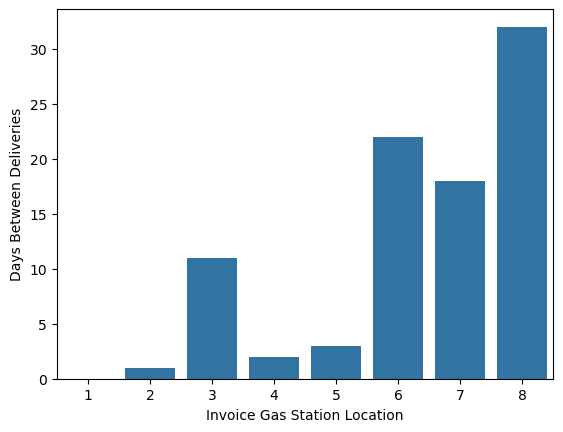

In [39]:
axes = sns.barplot(data=avg_time_between_deliveries, x='Invoice Gas Station Location', y='Days Between Deliveries')
plt.show()

### 3.1.2 Quantity of Replenishment
Next, we'll look at the average quantity of fuel purchased during each delivery.

In [40]:
# Calculating the average quantity of fuel purchased during each delivery for each gas station
avg_quantity_purchased = clean_Invoice.groupby(['Invoice Gas Station Location', 'Fuel Type'])['Amount Purchased'].mean().reset_index()

avg_quantity_purchased

,Invoice Gas Station Location,Fuel Type,Amount Purchased
0,1,D,8134.320588
1,1,G,14260.119706
2,2,D,9973.774663
3,2,G,9903.557109
4,3,D,10532.076098
5,3,G,10859.452718
6,4,D,8872.111043
7,4,G,9178.010326
8,5,D,6493.871616
9,5,G,8688.469781


In [41]:
clean_Invoice.reset_index(inplace=True)

In [42]:
clean_Invoice['Invoice Date'] = pd.to_datetime(clean_Invoice['Invoice Date'])
clean_Invoice['Date'] = clean_Invoice['Invoice Date'].dt.date
clean_Invoice

,index,Invoice Gas Station Location,Invoice Date,Invoice ID,Gross Purchase Cost,Amount Purchased,Fuel Type,Gas_Unit_Price,Days Between Deliveries,Date
0,0,1,2017-01-02,10000,7570.82000,6609.600,G,1.145428,NaT,2017-01-02
1,1330,1,2017-01-02,10001,12491.85300,9338.736,D,1.337639,0 days,2017-01-02
2,1338,1,2017-01-03,10006,5670.54418,4239.216,D,1.337640,1 days,2017-01-03
3,1339,1,2017-01-03,10007,7627.60115,6659.184,G,1.145426,0 days,2017-01-03
4,1340,1,2017-01-03,10008,32175.98500,26704.960,G,1.204869,0 days,2017-01-03
...,...,...,...,...,...,...,...,...,...,...
2826,2821,8,2019-05-07,12578,6840.23587,2657.888,D,2.573561,0 days,2019-05-07
2827,2817,8,2019-06-06,12655,7495.11180,5231.008,G,1.432824,30 days,2019-06-06
2828,2810,8,2019-07-09,12742,12359.36365,9056.336,G,1.364720,33 days,2019-07-09
2829,2826,8,2019-07-30,12795,5678.11500,3158.640,D,1.797646,21 days,2019-07-30


## 3.2 Weekly regular pattern analysis

In [43]:
clean_Invoice['Day of week']= pd.to_datetime(clean_Invoice['Date'])
clean_Invoice['Day of week']=clean_Invoice['Day of week'].dt.day_name()

In [44]:
group_week=clean_Invoice.groupby('Day of week').mean(numeric_only=True)
group_week.drop(['Invoice Gas Station Location','Invoice ID'], axis=1,inplace=True)
group_week

,index,Gross Purchase Cost,Amount Purchased,Gas_Unit_Price
Day of week,,,,
Friday,1326.282690,12299.669196,10709.913604,1.217580
Monday,1286.136015,10360.877471,9081.768123,1.184915
Saturday,746.000000,10319.610031,9673.094154,1.072114
Thursday,1694.446746,10322.947463,9175.760615,1.190079
Tuesday,1466.411658,14837.600557,12771.581319,1.256319
Wednesday,1455.471947,10304.554401,9071.285518,1.195567


Interpretaion:


    - Gas seems to be the cheapeat on Saturday

## 3.3 Fuel Price Analysis

### 3.3.1 Unit Price evolution Trajectory


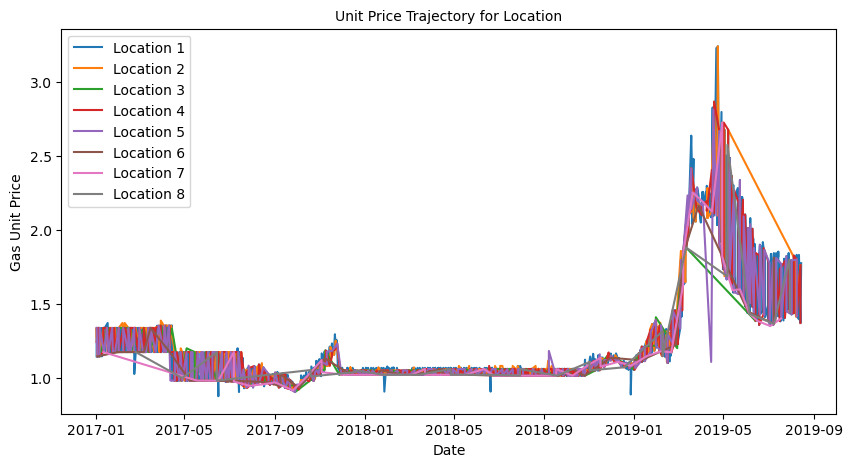

In [45]:
grouped_inv = clean_Invoice.groupby('Invoice Gas Station Location')

plt.figure(figsize=(10, 5))
# Loop through each group to plot
for name, group in grouped_inv:
    
    # Sort the group by 'Date'
    group = group.sort_values('Date')
    plt.plot(group['Date'], group['Gas_Unit_Price'], label=f'Location {name}')
plt.title(f'Unit Price Trajectory for Location', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Gas Unit Price')
plt.legend(loc='upper left')
plt.show()

### 3.3.1 Interpretation
    - We could see that in general all gas station follows the same trend
    - From 2017 ~ 2018, the gas price falls from around 1.3 to below $1 per liter. 
    - At year end 2017 (2017-9 to 2018-1) we have a small hike in the gas price to around $1.2 
    - For year 2018, the Unit gas price is stable around $1 dollar. 
    - Starting end of 2018, gas price starts to pick up. Gas price peaked around $3.2 dollars/liter; Then it experienced a sharp decline during the second half of 2019 to $1.4~$1.8
    - we could also see that there is a much winder fluctuation of prices during 2019 compare to 2018
    
### 3.3.1 Things to consider to optimize inventory:
    - During price rise, we would want to adjust our purchasing amount to pre-stock a certain amount of gas to prevent rising prices cutting into profit
        - However, we need to be careful of overstocking as price may drop without expectation, and we will result in excess stocks over the market price ( incur losses) 
    - On the opposite, when prices are declining, we might want to reduce inventory, because we may be able to get cheaper gas as the price continue to dorp, so we could obtain cheaper gas if we replenish/repurchase more frequently
    - However, we also have to consider the gas volitility. If we repurchase more frequently during high volitile time, we might be allowing the market price to influent revenue. This is an extra market risk
    - Ex.) in second half of 2017, although price is also declining, it is much less volitile than second hald of 2019. So we might be more audacious in purchasing bulk replenishment fuel at discount price. However, during second hald of 2019, this approch might result in a stock of overpriced/underpriced inventory and thusly incur lossees (especially compared to the competitors)
        

## 3.4 Purchasing Behavior Analysis

In [46]:
agg_values = clean_Invoice.groupby('Invoice Gas Station Location')[['Gross Purchase Cost', 'Amount Purchased', 'Gas_Unit_Price']].mean().reset_index()

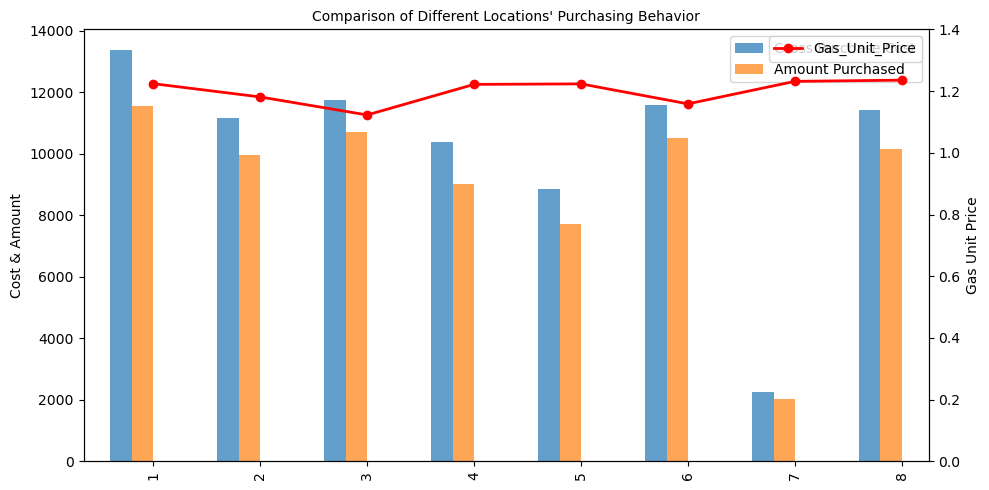

In [47]:

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(10, 5))
agg_values.plot(kind='bar', y=['Gross Purchase Cost', 'Amount Purchased'], ax=ax1, position=1, width=0.4, alpha=0.7)

# Set up a second y-axis for the line plot
ax2 = ax1.twinx()

# Create the line plot for 'Gas_Unit_Price'
agg_values.plot(kind='line', y='Gas_Unit_Price', marker='o', ax=ax2, linewidth=2, color='r')

# Set axis labels and title
ax1.set_ylabel('Cost & Amount')
ax2.set_ylabel('Gas Unit Price')
ax2.set_ylim(bottom=0., top=1.4)
ax1.set_xticklabels(agg_values['Invoice Gas Station Location'])
ax1.set_title('Comparison of Different Locations\' Purchasing Behavior', fontsize=10)

plt.tight_layout()
plt.show()

## 3.5 Data Distribution Analysis

### 3.5.1 Unit Price Distribution

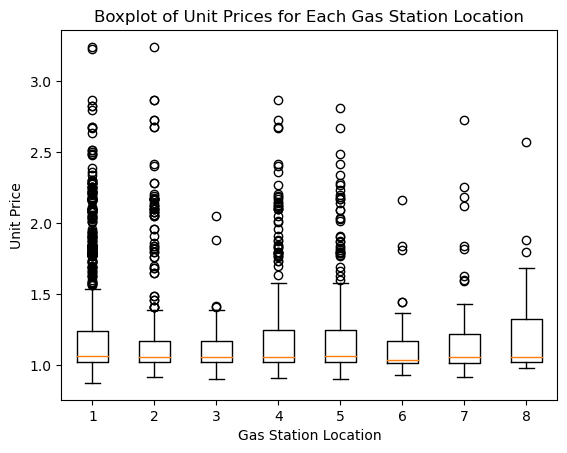

In [48]:
plt.figure()
boxplot_data = [group['Gas_Unit_Price'].values for name, group in clean_Invoice.groupby('Invoice Gas Station Location')]
labels = [name for name, group in clean_Invoice.groupby('Invoice Gas Station Location')]

plt.boxplot(boxplot_data, labels=labels)
plt.title('Boxplot of Unit Prices for Each Gas Station Location')
plt.xlabel('Gas Station Location')
plt.ylabel('Unit Price')
plt.show()

- we see that location 1 & 2 have the most volitile price distribution. This may increase risk in their cost. 
- location 3 & 6 seems to have the most stable unit cost
- we Observe higher average cost because there are many outliers of very high unit price. But the median cost per liter still maintains around 1 dollar

### 3.5.2 Gross Purchase Distribution

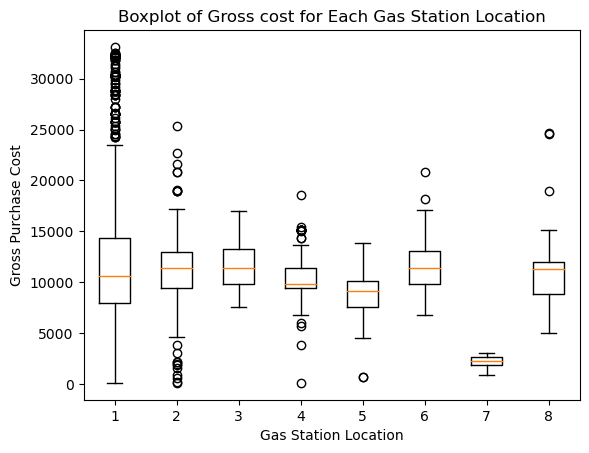

In [49]:
plt.figure()
boxplot_data = [group['Gross Purchase Cost'].values for name, group in clean_Invoice.groupby('Invoice Gas Station Location')]
labels = [name for name, group in clean_Invoice.groupby('Invoice Gas Station Location')]

plt.boxplot(boxplot_data, labels=labels)
plt.title('Boxplot of Gross cost for Each Gas Station Location')
plt.xlabel('Gas Station Location')
plt.ylabel('Gross Purchase Cost')
plt.show()

- We could see that the gross cost of gas location 1 is the most volitile. 
- Location 7 has the lowest gross purchase cost 

## 3.6 Comparison of Replenishment Behavior and Cost Before and After 2019


In [50]:
clean_Invoice['Date'] = pd.to_datetime(clean_Invoice['Date'])
comparison_date = pd.to_datetime('2019-01-01')

In [51]:
# We want to compare replenishment quantity and frequency before and after 2019 because there is a huge price trend difference 

# Calculating monthly replenishment frequency and average replenishent values before and after 2019
monthly_rep_freq_bf2019 = (fuel_merge[fuel_merge['Time'] < comparison_date].groupby('Tank_ID')['Replenishment'].sum()/33)
Avg_rep_Amount_bf2019 = fuel_merge[fuel_merge['Time'] < comparison_date].groupby('Tank_ID')['Rep_Quantity'].mean()
monthly_rep_freq_af2019 = fuel_merge[fuel_merge['Time'] > comparison_date].groupby('Tank_ID')['Replenishment'].sum()/33
Avg_rep_Amount_af2019 = fuel_merge[fuel_merge['Time'] > comparison_date].groupby('Tank_ID')['Rep_Quantity'].mean()

#Composing a dataframe for comparison 
Tanks_Comparisons = Tanks
Tanks_Comparisons['monthly_rep_freq_bf2019'] = monthly_rep_freq_bf2019.values
Tanks_Comparisons['Avg_rep_Amount_bf2019'] = Avg_rep_Amount_bf2019.values
Tanks_Comparisons['monthly_rep_freq_af2019'] = monthly_rep_freq_af2019.values
Tanks_Comparisons['Avg_rep_Amount_af2019'] = Avg_rep_Amount_af2019.values


Tanks_Comparisons.groupby('Tank Location').mean(numeric_only=True)

,Tank Number,Tank Capacity,monthly_rep_freq,Avg_rep_Amount,monthly_rep_freq_bf2019,Avg_rep_Amount_bf2019,monthly_rep_freq_af2019,Avg_rep_Amount_af2019
Tank Location,,,,,,,,
1,3.5,40000.0,101.828283,1027.177695,76.656566,35.165052,25.171717,34.133917
2,2.5,55000.0,74.590909,720.869091,57.007576,21.662836,17.575758,11.456214
3,1.5,30000.0,36.954545,304.137338,24.696970,6.438086,12.257576,3.087639
4,1.5,40000.0,48.257576,1114.247199,36.878788,21.223586,11.378788,20.956156
5,1.5,25000.0,57.348485,630.437978,39.636364,17.694233,17.712121,13.927664
6,2.0,30000.0,35.131313,131.410380,27.050505,1.990106,8.070707,1.496041
7,1.5,5000.0,35.287879,46.080142,23.242424,0.776782,12.030303,0.727478
8,1.5,40000.0,89.363636,53.760622,56.909091,2.005113,32.454545,1.965969


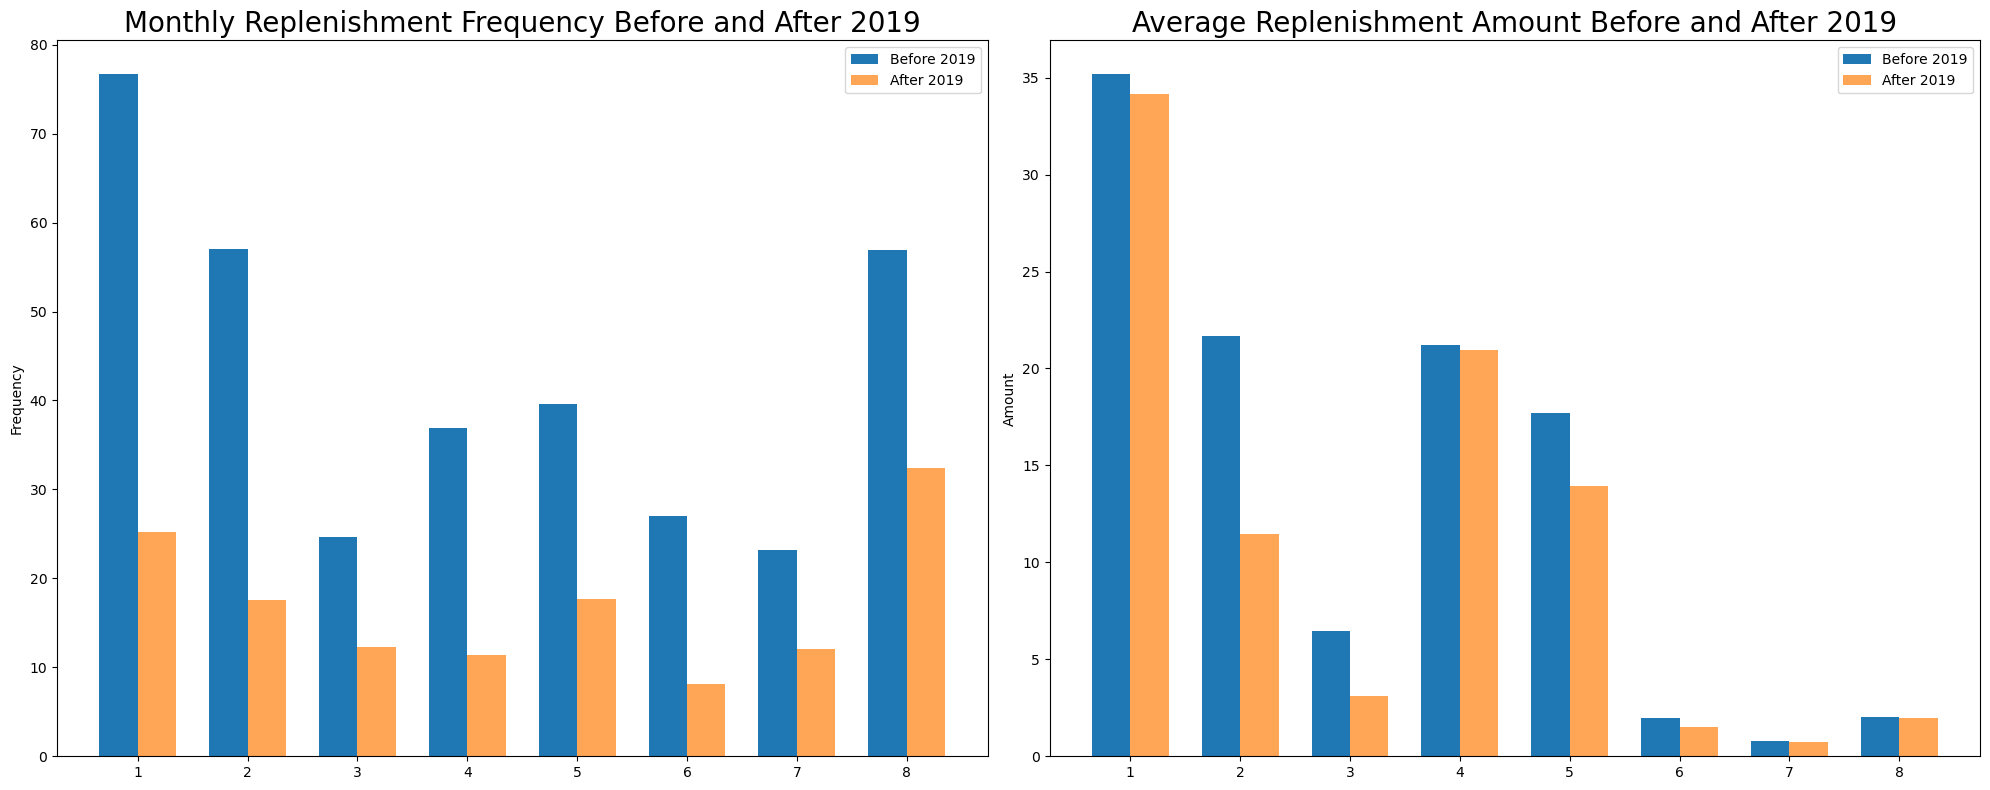

In [52]:
mean_values_by_location = Tanks_Comparisons.groupby('Tank Location').mean(numeric_only=True).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
bar_width = 0.35
index = np.arange(len(mean_values_by_location))

# Plot for Monthly Replenishment Frequency Before and After 2019
axes[0].bar(index, mean_values_by_location['monthly_rep_freq_bf2019'], bar_width, label='Before 2019')
axes[0].bar(index + bar_width, mean_values_by_location['monthly_rep_freq_af2019'], bar_width, label='After 2019', alpha=0.7)
axes[0].set_title('Monthly Replenishment Frequency Before and After 2019',fontsize=20)
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(mean_values_by_location['Tank Location'])
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot for Average Replenishment Amount Before and After 2019
axes[1].bar(index, mean_values_by_location['Avg_rep_Amount_bf2019'], bar_width, label='Before 2019')
axes[1].bar(index + bar_width, mean_values_by_location['Avg_rep_Amount_af2019'], bar_width, label='After 2019', alpha=0.7)
axes[1].set_title('Average Replenishment Amount Before and After 2019',fontsize=20)
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(mean_values_by_location['Tank Location'])
axes[1].set_ylabel('Amount')
axes[1].legend()

plt.tight_layout()
plt.show()

In [53]:
# We also want to see how the Gas Unit Price and Gross cost changes before and after 2019
filtered_clean_Invoice_1 = clean_Invoice[clean_Invoice['Date'] < comparison_date]
filtered_clean_Invoice_2 = clean_Invoice[clean_Invoice['Date'] < comparison_date]

averages_before = filtered_clean_Invoice_1.groupby('Invoice Gas Station Location')[['Gross Purchase Cost','Gas_Unit_Price']].mean()
averages_after= filtered_clean_Invoice_2.groupby('Invoice Gas Station Location')[['Gross Purchase Cost','Gas_Unit_Price']].mean()
comparison_cost = averages_before.merge(averages_after, on='Invoice Gas Station Location', suffixes=('_before', '_after'))
comparison_cost.describe()

,Gross Purchase Cost_before,Gas_Unit_Price_before,Gross Purchase Cost_after,Gas_Unit_Price_after
count,8.000000,8.000000,8.000000,8.000000
mean,10430.881725,1.065976,10430.881725,1.065976
std,3540.592461,0.018241,3540.592461,0.018241
min,2417.615187,1.033517,2417.615187,1.033517
25%,10043.203495,1.051422,10043.203495,1.051422
50%,11584.521869,1.074914,11584.521869,1.074914
75%,12360.292881,1.080099,12360.292881,1.080099
max,13506.994912,1.081811,13506.994912,1.081811


In [54]:
# Reset index for easier plotting
averages_before = averages_before.reset_index()
averages_after = averages_after.reset_index()

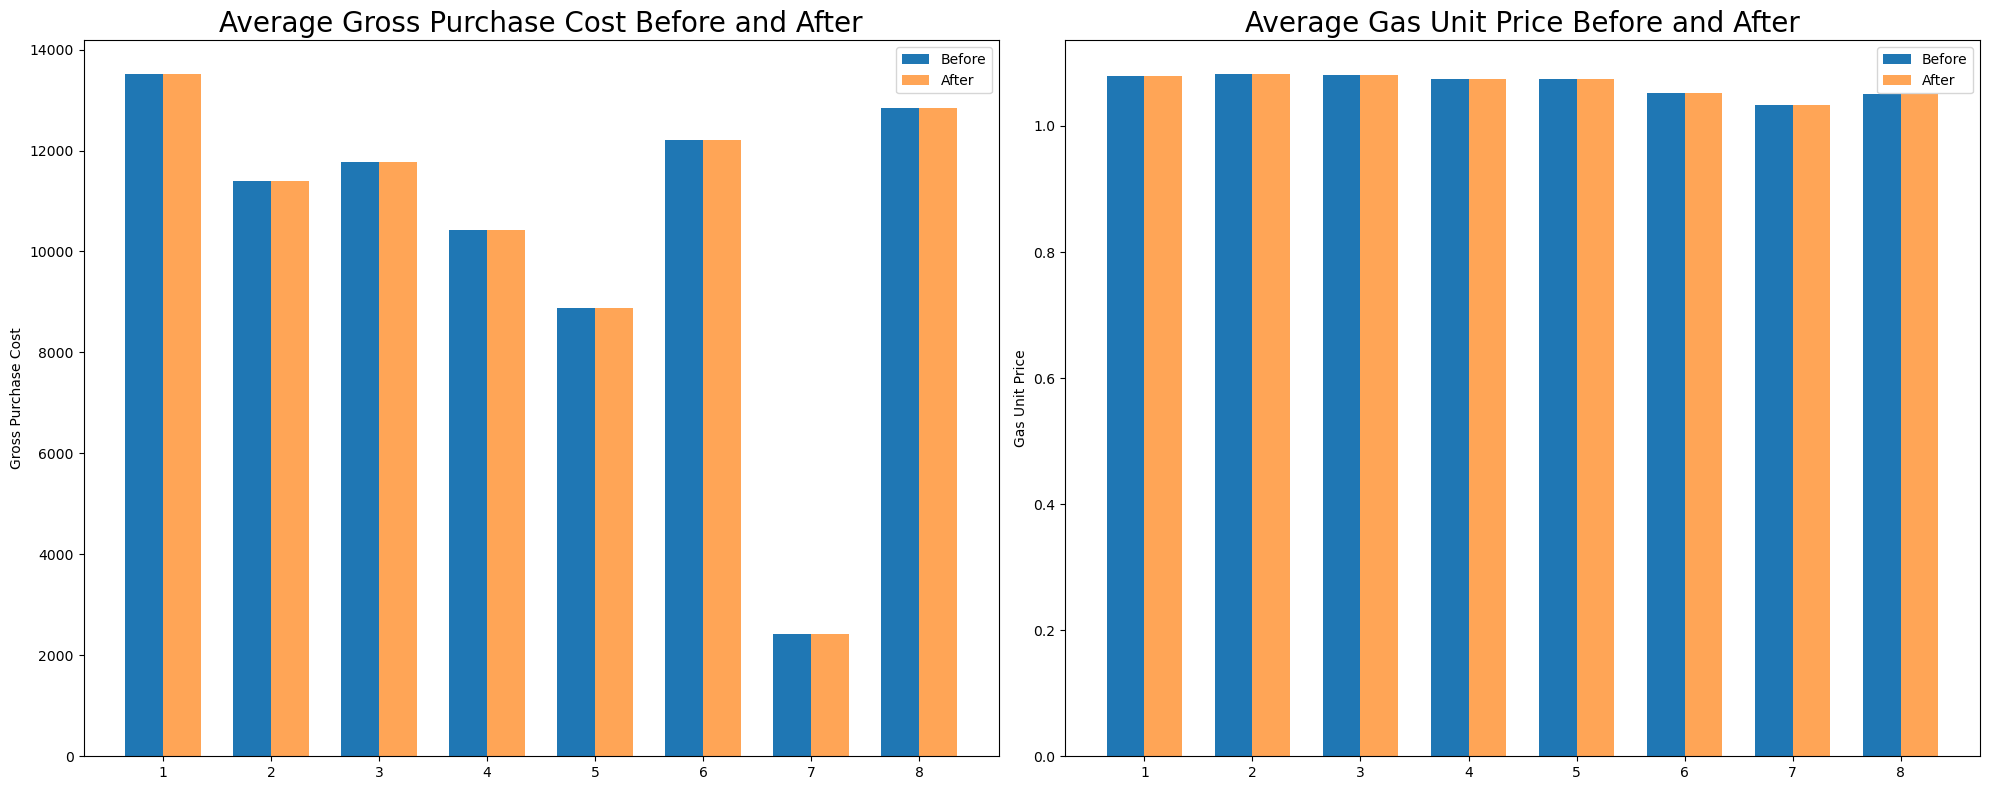

In [55]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
bar_width = 0.35
index = np.arange(len(averages_before))

# Plot for Average Gross Purchase Cost Before and After
axes[0].bar(index, averages_before['Gross Purchase Cost'], bar_width, label='Before')
axes[0].bar(index + bar_width, averages_after['Gross Purchase Cost'], bar_width, label='After', alpha=0.7)
axes[0].set_title('Average Gross Purchase Cost Before and After',fontsize=20)
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(averages_before['Invoice Gas Station Location'])
axes[0].set_ylabel('Gross Purchase Cost')
axes[0].legend()

# Plot for Average Gas_Unit_Price Before and After
axes[1].bar(index, averages_before['Gas_Unit_Price'], bar_width, label='Before')
axes[1].bar(index + bar_width, averages_after['Gas_Unit_Price'], bar_width, label='After', alpha=0.7)
axes[1].set_title('Average Gas Unit Price Before and After',fontsize=20)
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(averages_before['Invoice Gas Station Location'])
axes[1].set_ylabel('Gas Unit Price')
axes[1].legend()

plt.tight_layout()
plt.show()

## 3.7 Amount Purchase Trajectory

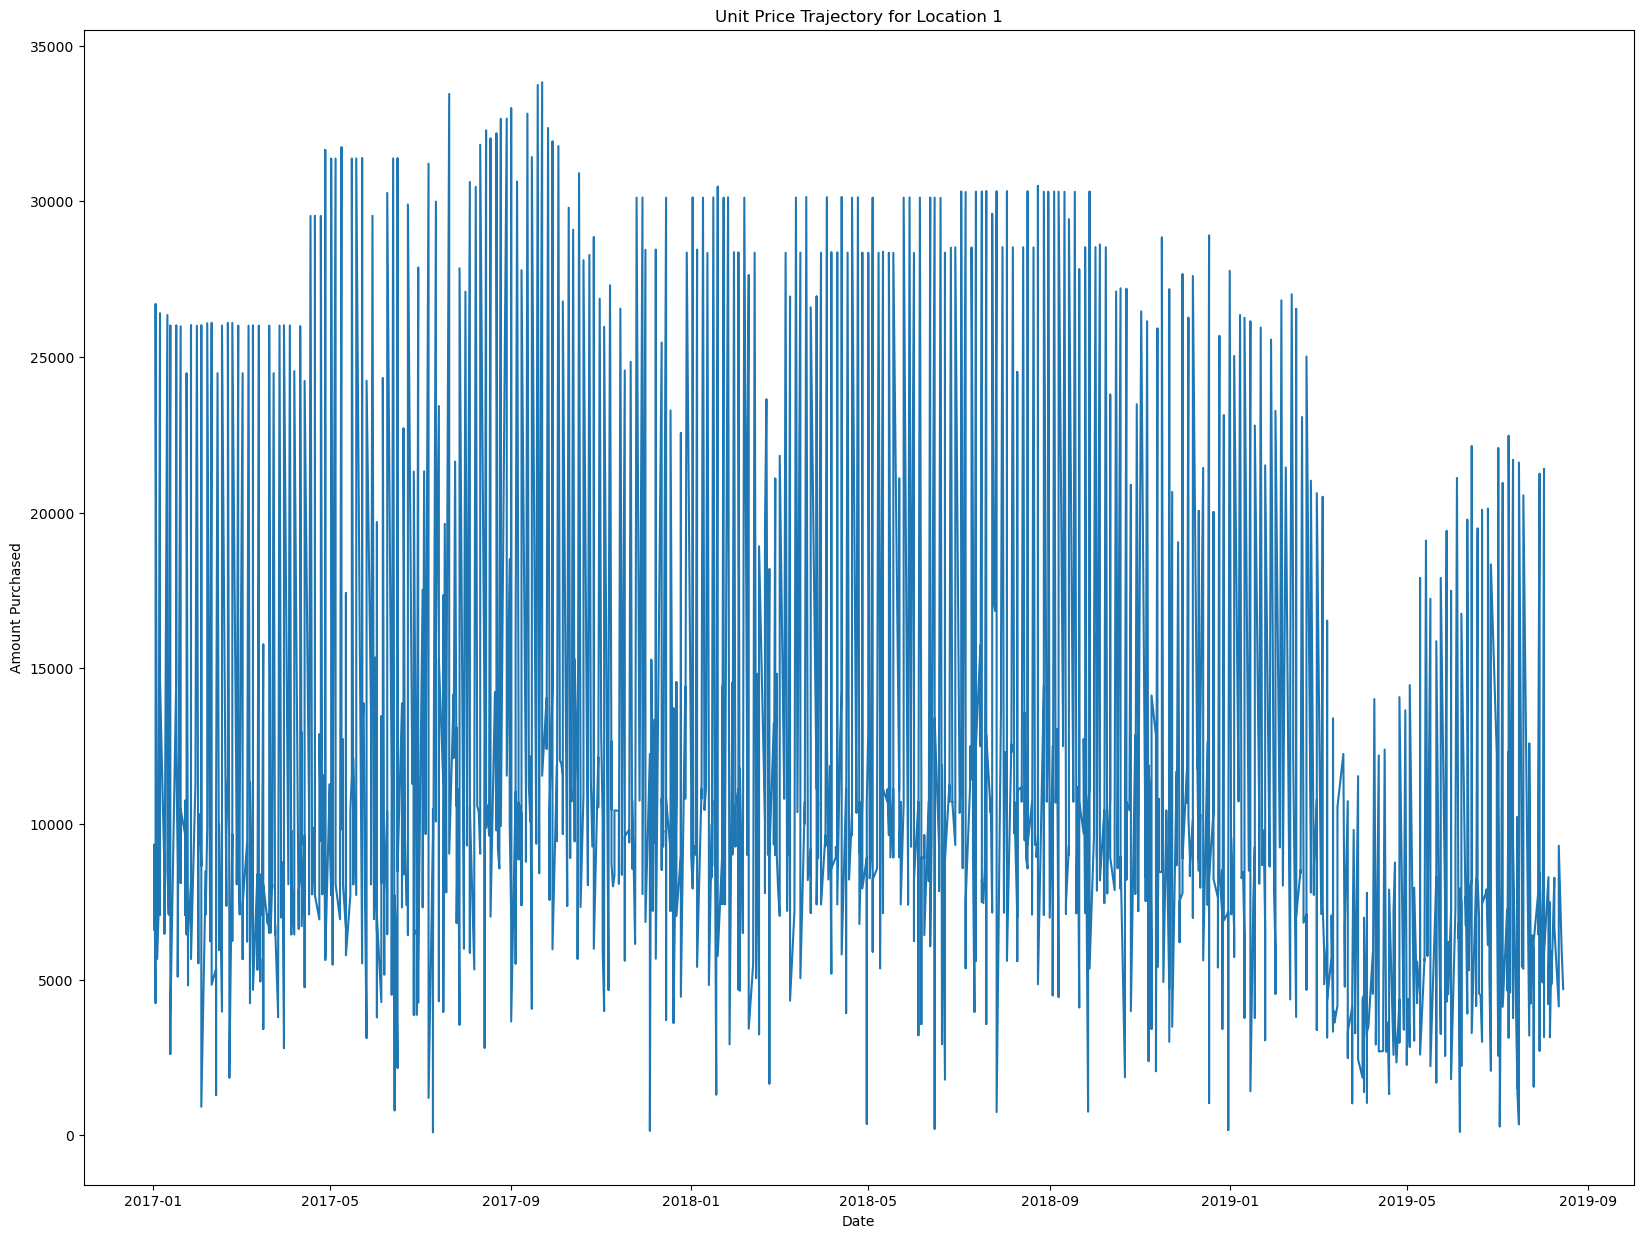

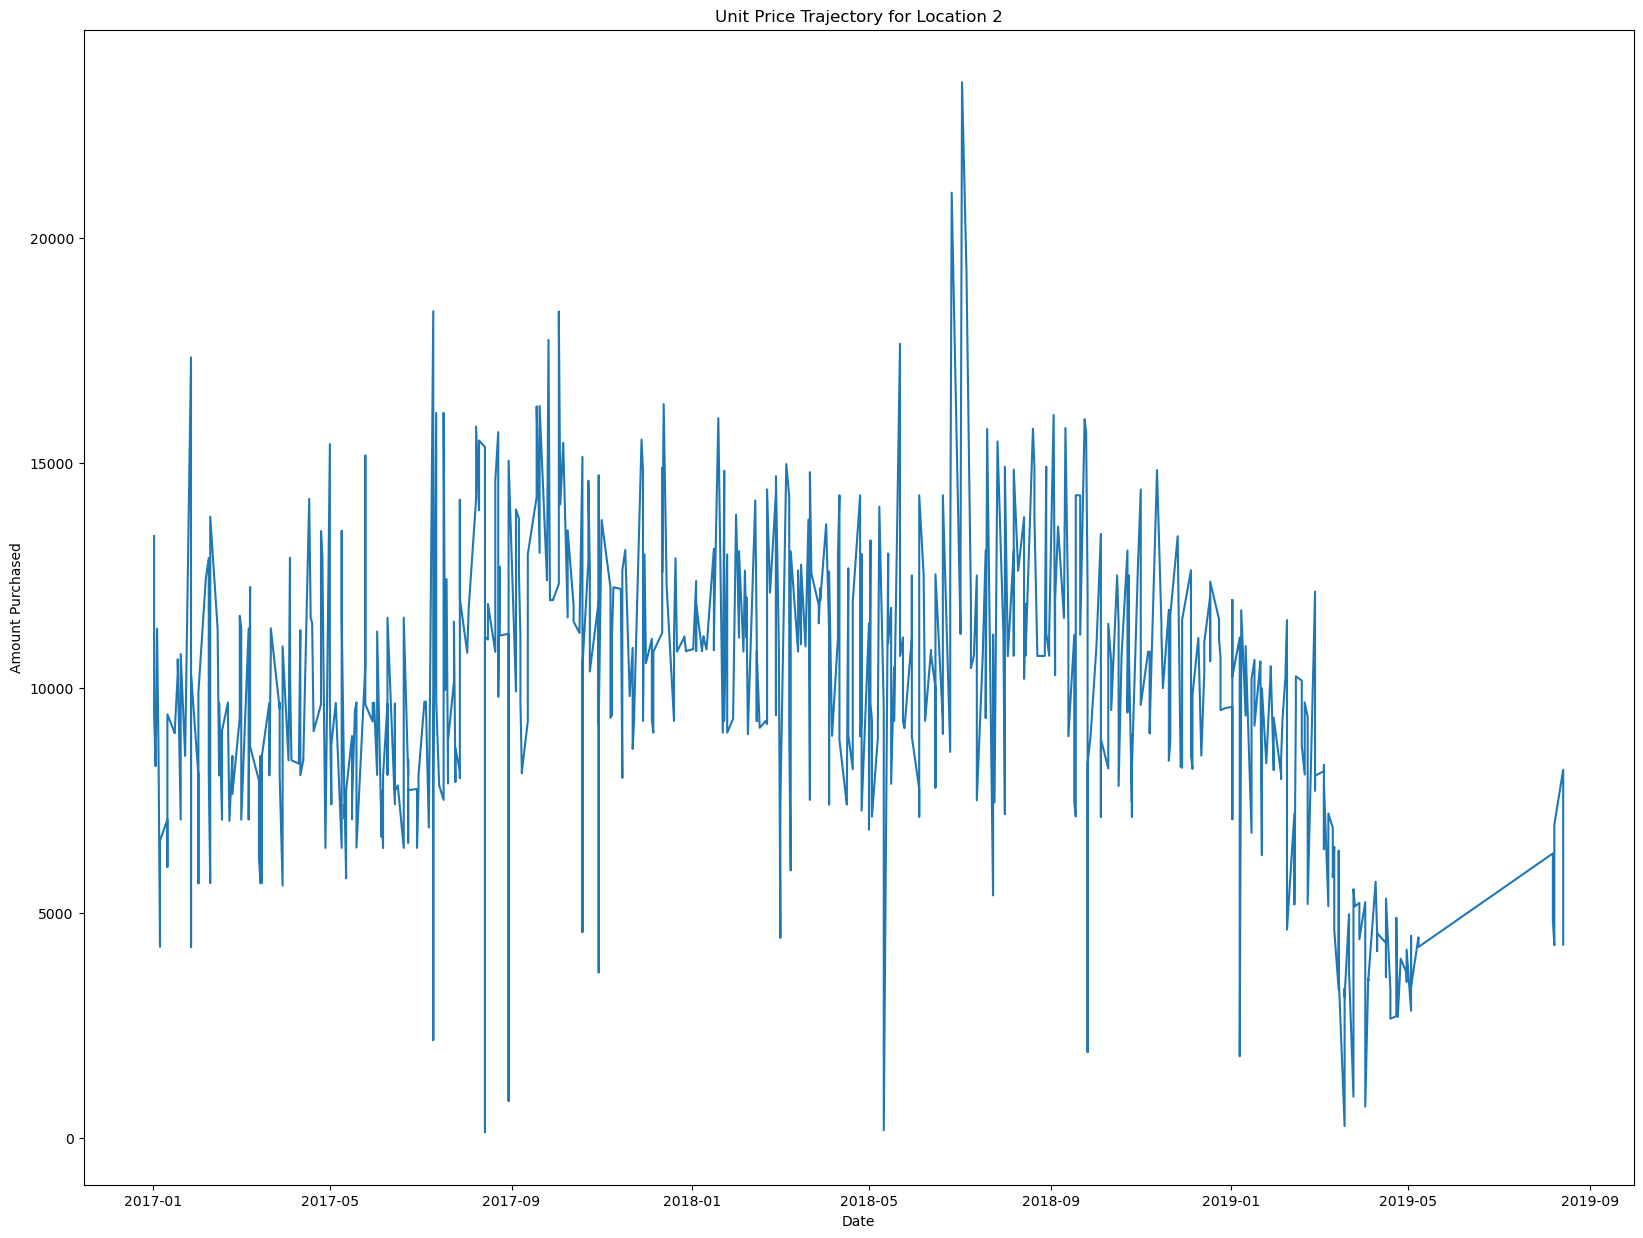

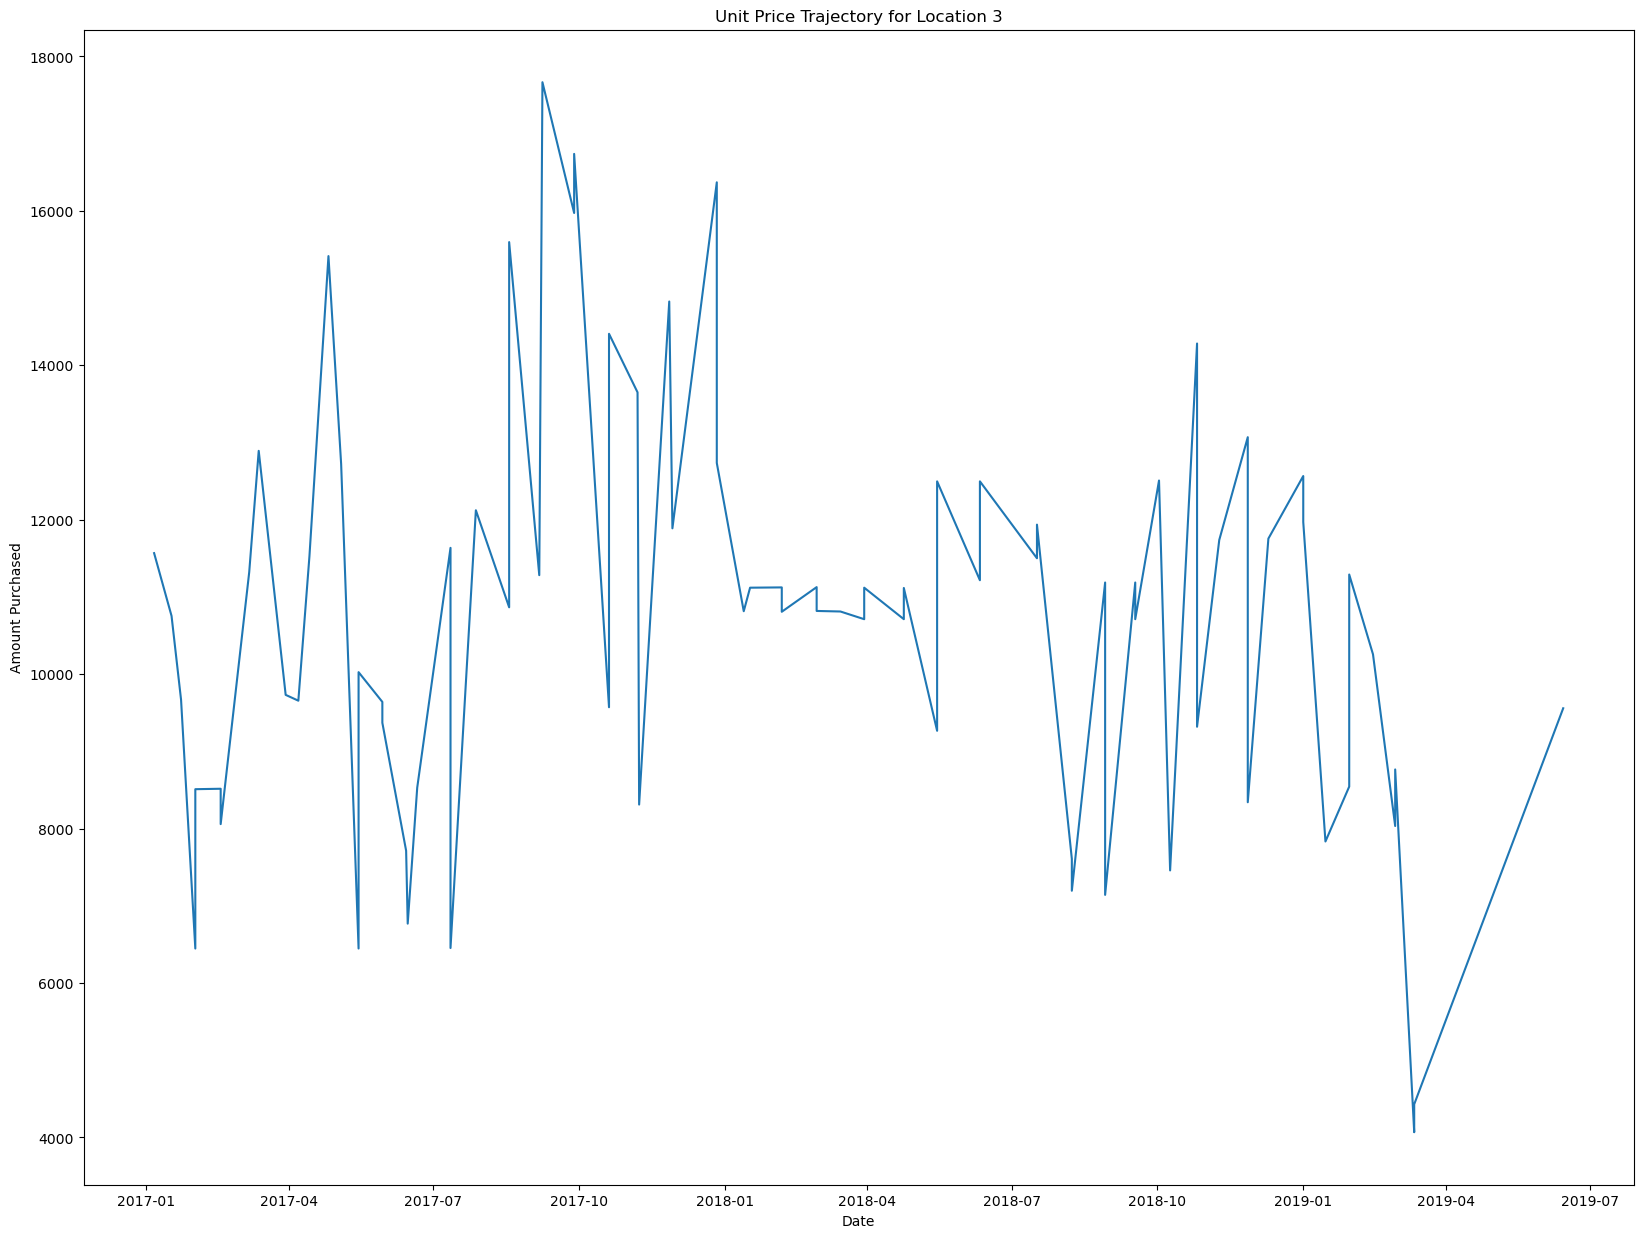

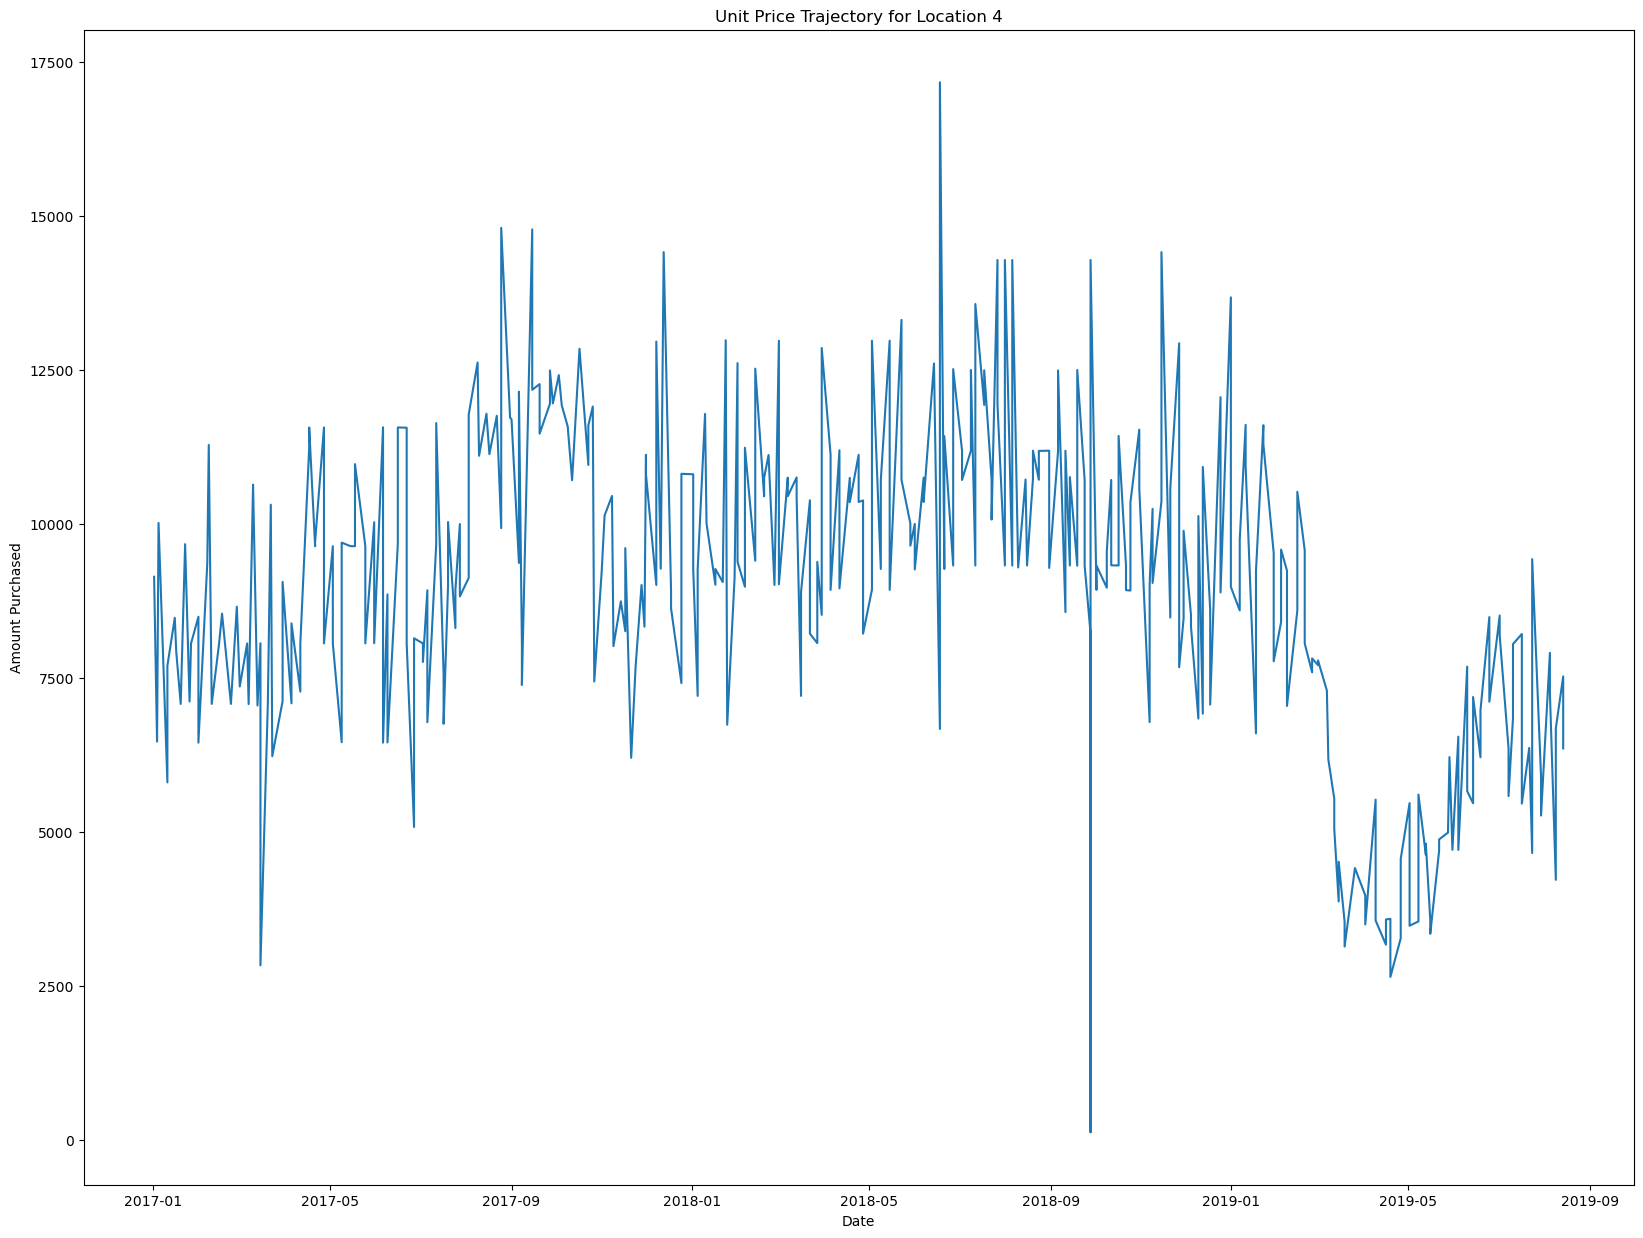

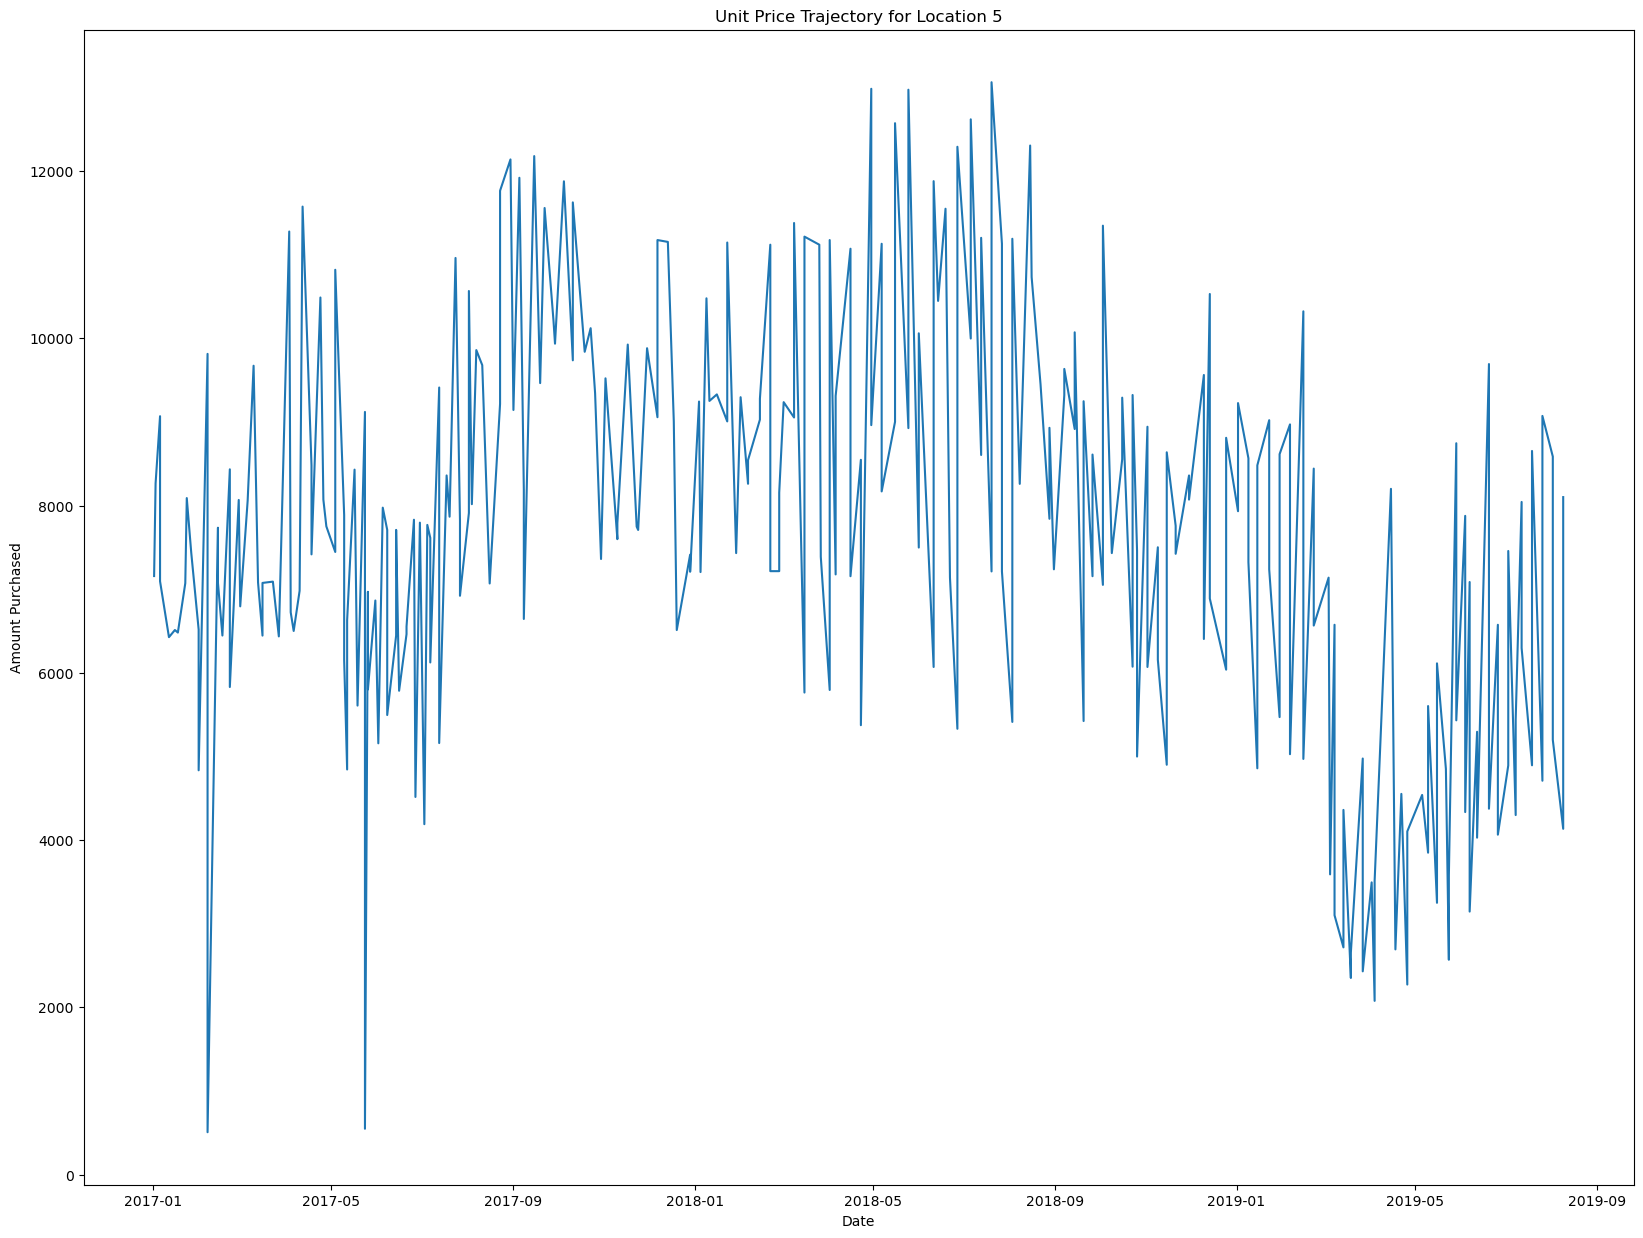

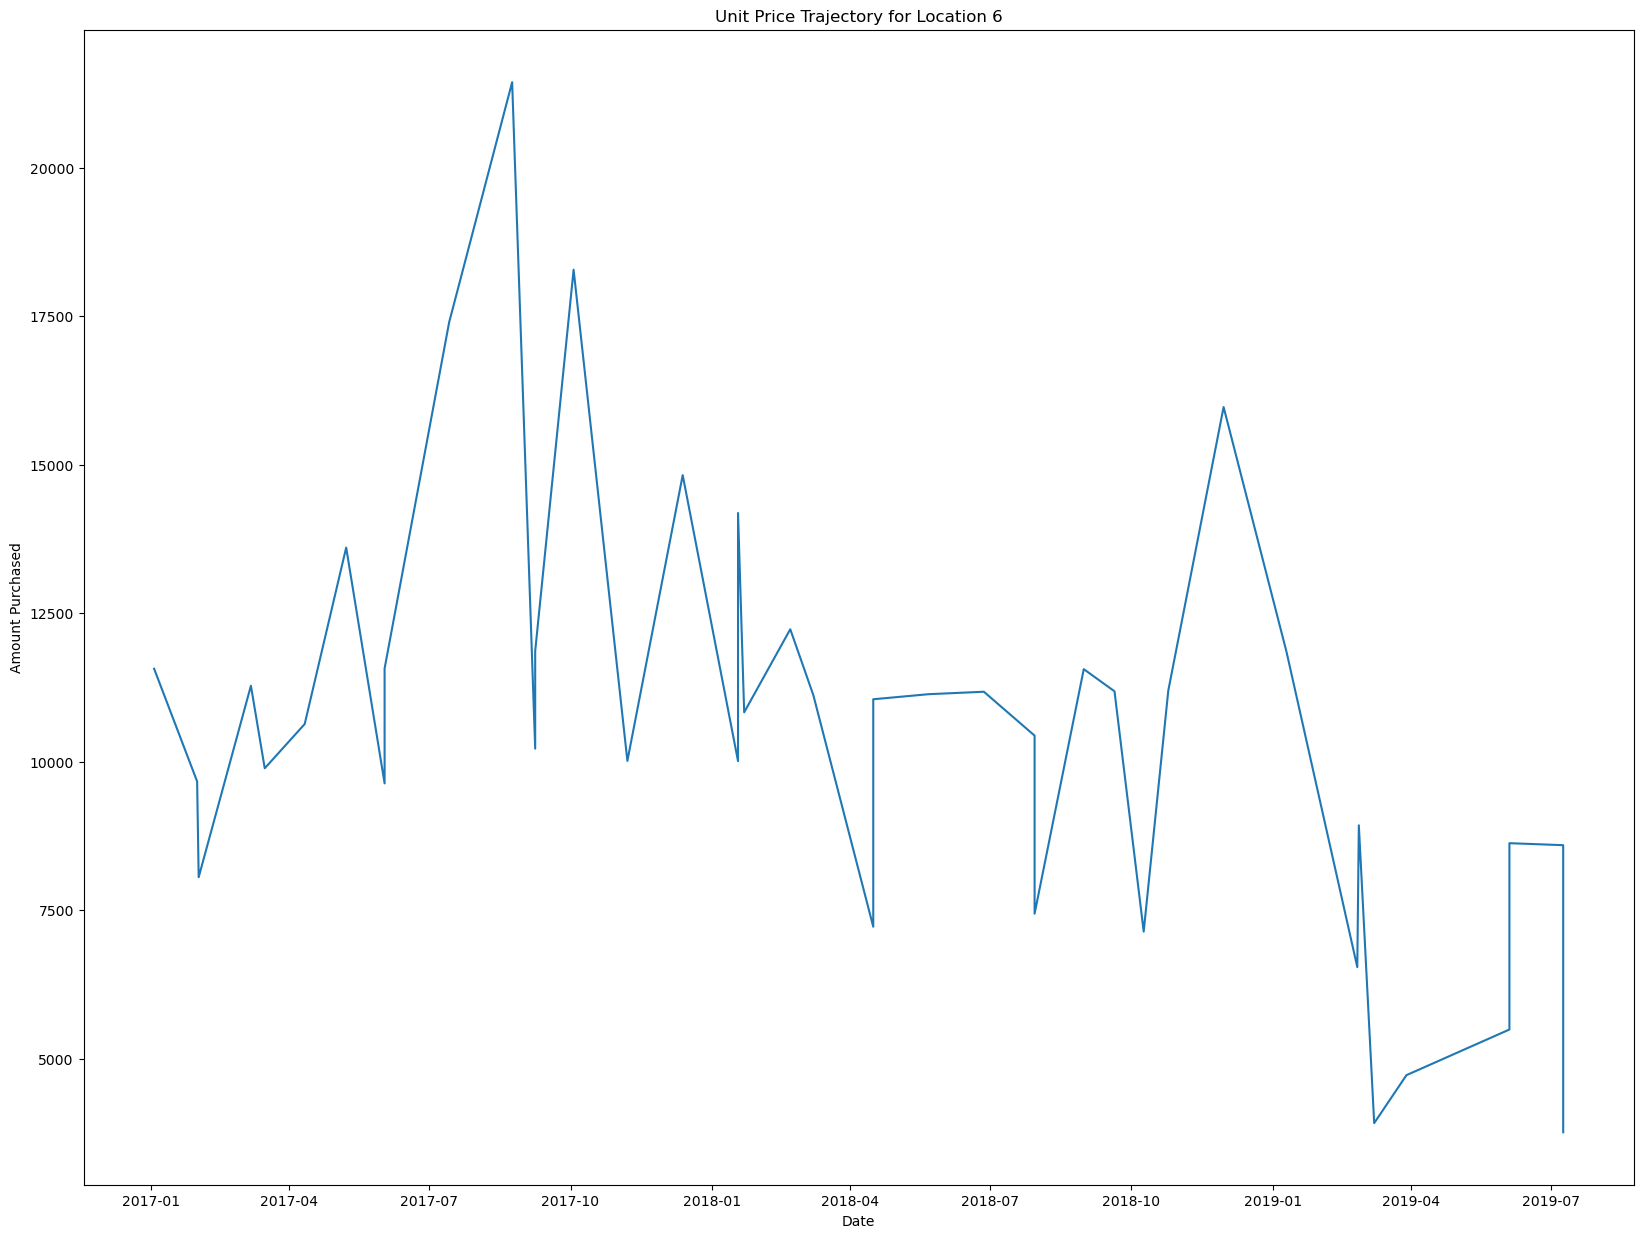

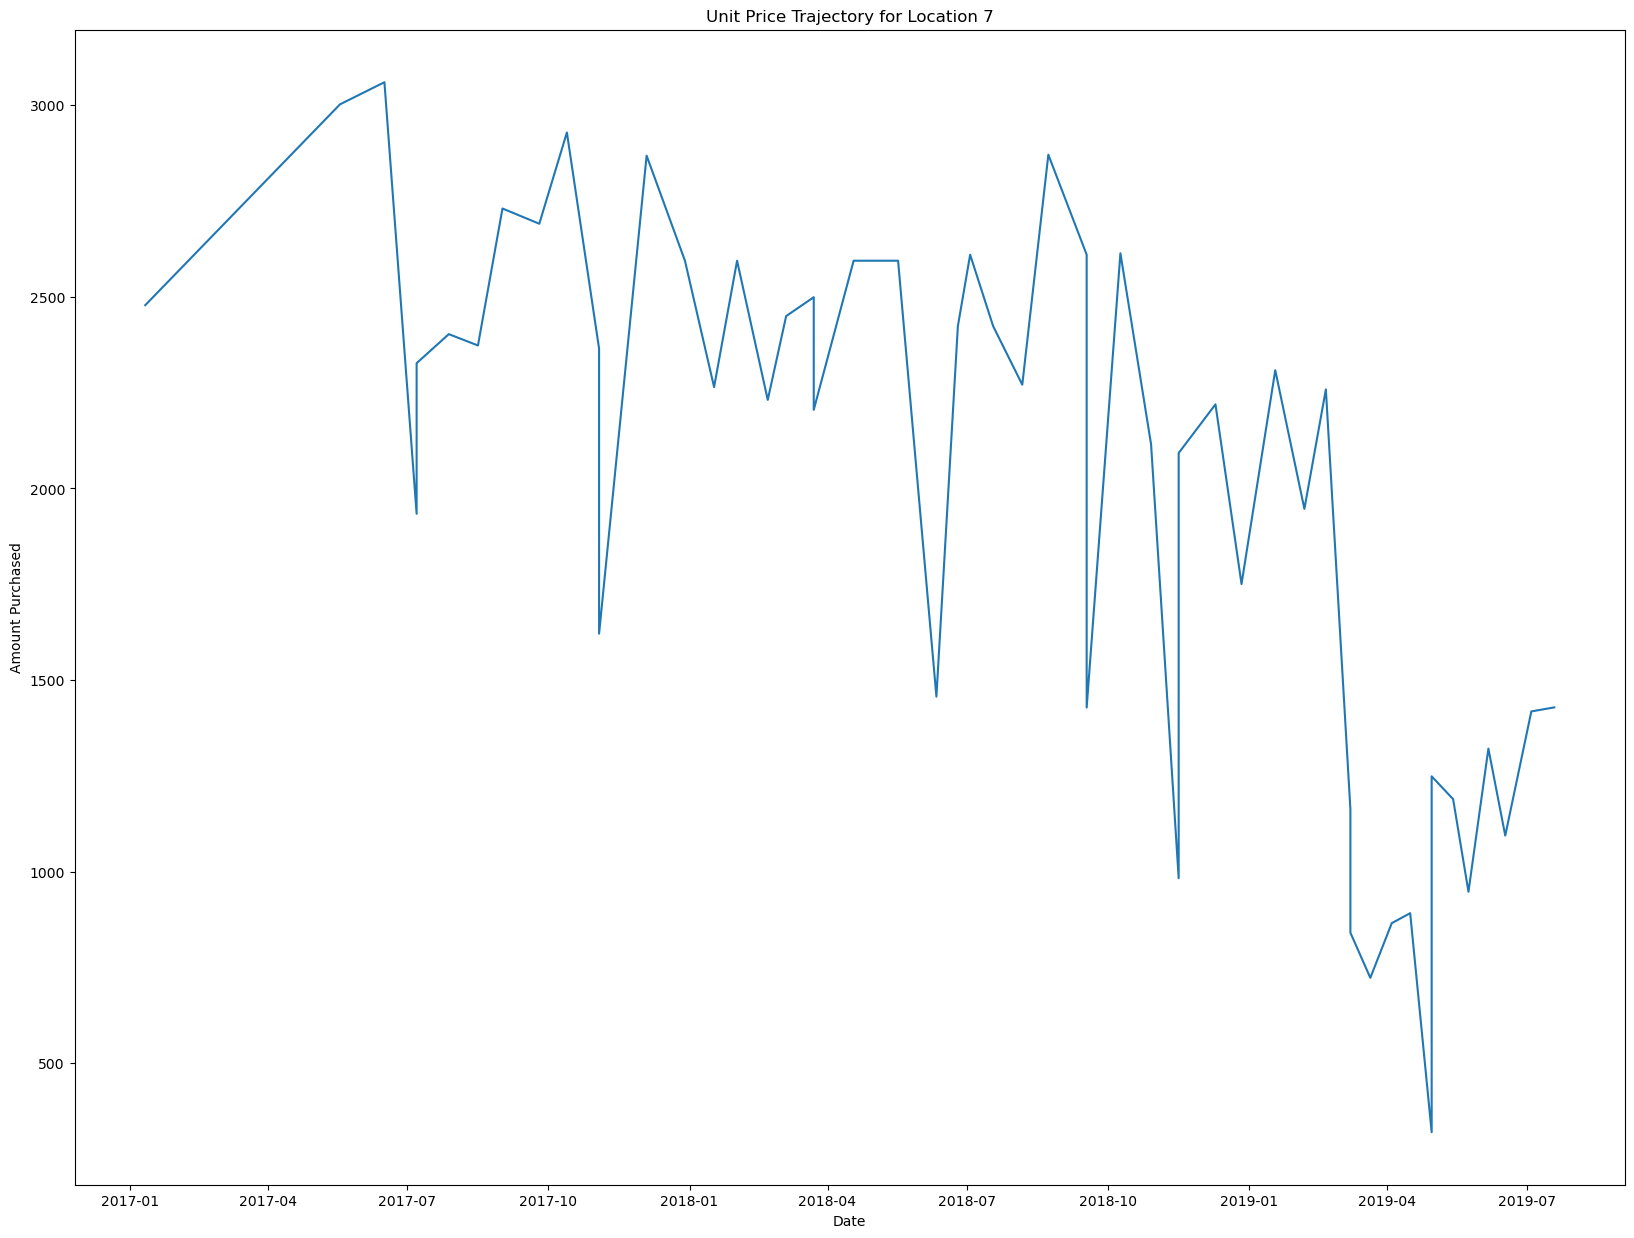

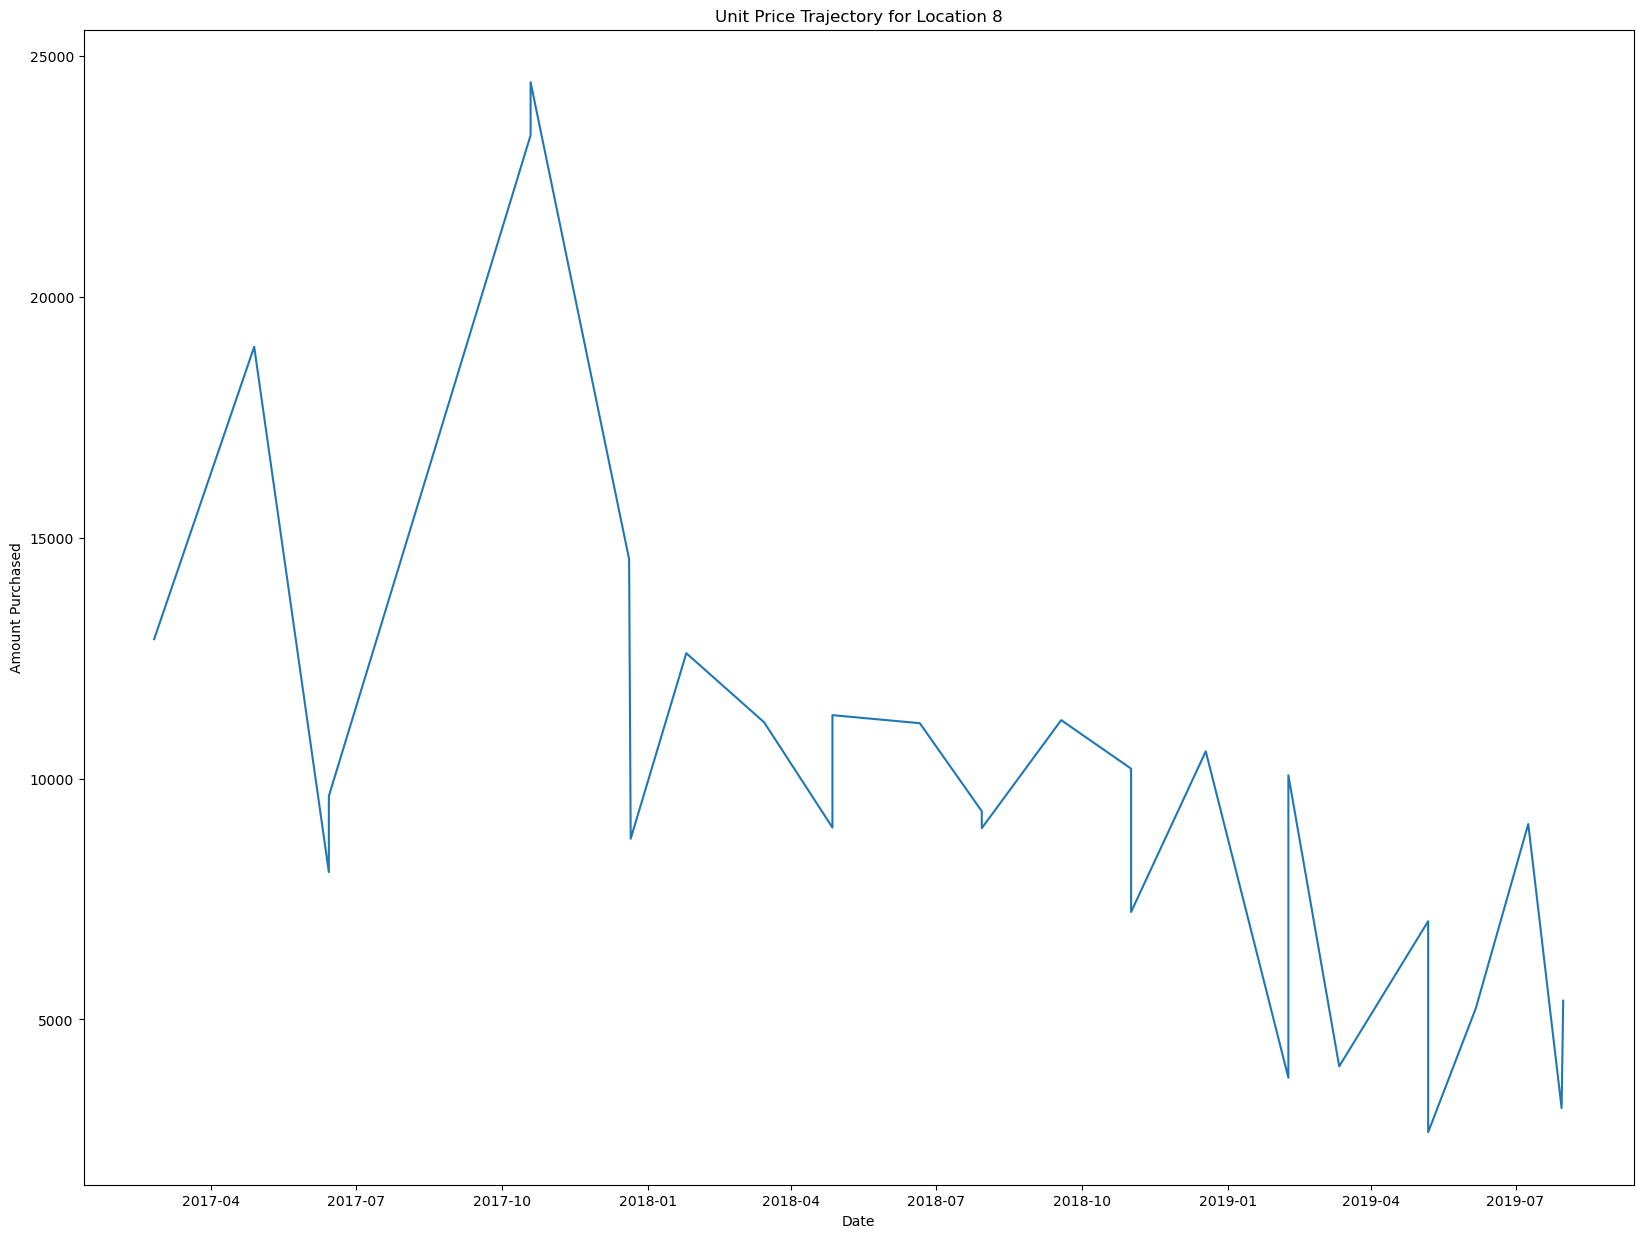

In [56]:
grouped_inv = clean_Invoice.groupby('Invoice Gas Station Location')

# Loop through each group to plot
for name, group in grouped_inv:
    plt.figure(figsize=(20, 15))
    # Sort the group by 'Date'
    group = group.sort_values('Date')
    plt.plot(group['Date'], group['Amount Purchased'], label=f'Location {name}')
    plt.title(f'Unit Price Trajectory for Location {name}')
    plt.xlabel('Date')
    plt.ylabel('Amount Purchased')
    plt.show()

# 4. Exploratory Approch in finding relationships between consumptions and Purchase

## 4.1 Explore Cost savings

In [57]:
# step 1: define discount tires
# For amount '0-15000', disount is 0,
# for amount '15000-25000', discount is 0.02 per liter
# for amount '25000 - 4000', discount is 0.03
# for amount '40000+', discount is 0.04

discount_rate = [0, 0.02, 0.03, 0.04]

# step 2 Define a discount saving calculation function 
def saving_cal(amount):
    if amount <= 15_000:
        return amount * discount_rate[0]
    elif 15_000 < amount <= 25_000:
        return amount * discount_rate[1]
    elif 15_000 < amount <= 25_000:
        return amount * discount_rate[2]
    else:
        return amount * discount_rate[3]


In [58]:
# use this function to create another column for the invoice data 
clean_Invoice['Amount_saved'] = clean_Invoice['Amount Purchased'].apply(saving_cal)
clean_Invoice.head()

,index,Invoice Gas Station Location,Invoice Date,Invoice ID,Gross Purchase Cost,Amount Purchased,Fuel Type,Gas_Unit_Price,Days Between Deliveries,Date,Day of week,Amount_saved
0,0,1,2017-01-02,10000,7570.82000,6609.600,G,1.145428,NaT,2017-01-02,Monday,0.0000
1,1330,1,2017-01-02,10001,12491.85300,9338.736,D,1.337639,0 days,2017-01-02,Monday,0.0000
2,1338,1,2017-01-03,10006,5670.54418,4239.216,D,1.337640,1 days,2017-01-03,Tuesday,0.0000
3,1339,1,2017-01-03,10007,7627.60115,6659.184,G,1.145426,0 days,2017-01-03,Tuesday,0.0000
4,1340,1,2017-01-03,10008,32175.98500,26704.960,G,1.204869,0 days,2017-01-03,Tuesday,1068.1984


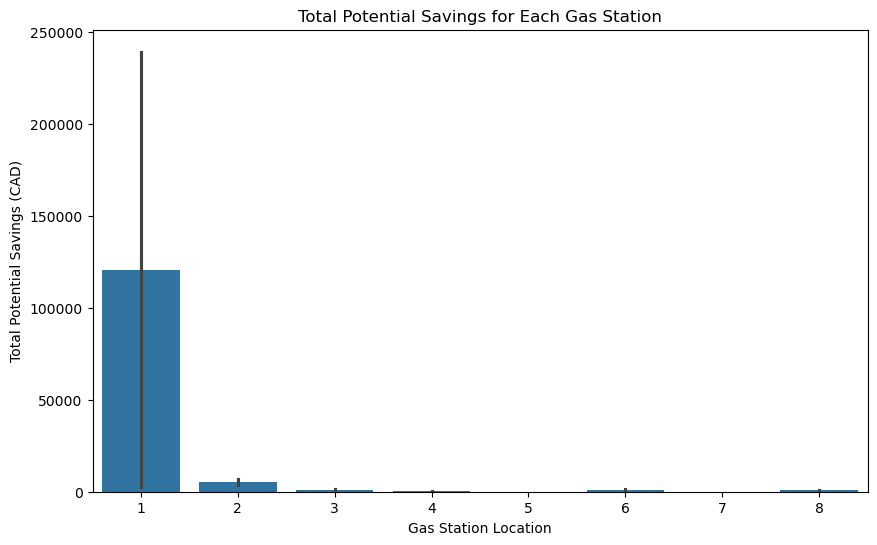

,Invoice Gas Station Location,Fuel Type,Amount_saved
0,1,D,2347.70624
1,1,G,239225.13824
2,2,D,6761.38656
3,2,G,3534.93504
4,3,D,319.43968
5,3,G,1635.61088
6,4,D,343.36672
7,4,G,0.00000
8,5,D,0.00000
9,5,G,0.00000


In [59]:
# Calculate the total potential savings for each gas station
total_savings = clean_Invoice.groupby(['Invoice Gas Station Location','Fuel Type'])['Amount_saved'].sum().reset_index()

# Plotting the total potential savings for each gas station ov
plt.figure(figsize=(10, 6))
sns.barplot(x='Invoice Gas Station Location', y='Amount_saved', data=total_savings)
plt.title('Total Potential Savings for Each Gas Station')
plt.xlabel('Gas Station Location')
plt.ylabel('Total Potential Savings (CAD)')
plt.show()

total_savings

### 4.1.1 We could also normalize the amount save so that the amount save is present in per liter. This will help us better compare the savings ability across differnt gas locations

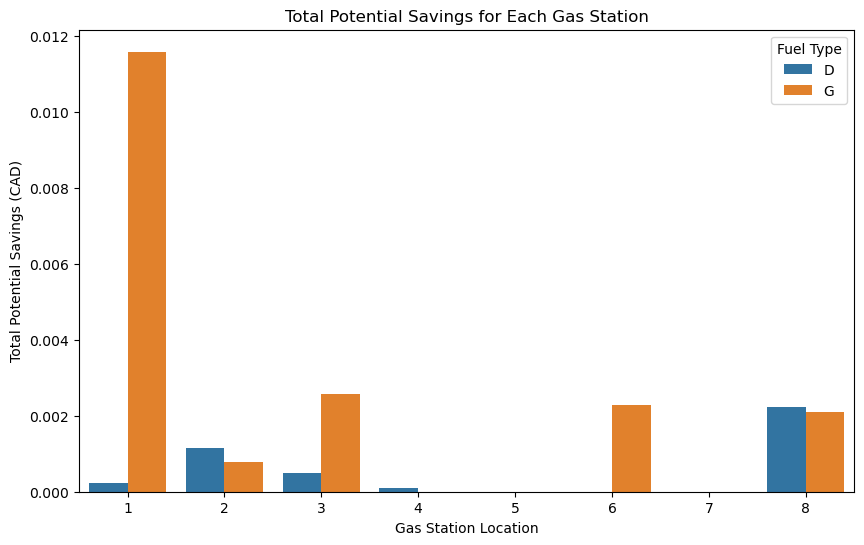

,Invoice Gas Station Location,Fuel Type,save_per_liter
0,1,D,0.000234
1,1,G,0.011575
2,2,D,0.001153
3,2,G,0.000772
4,3,D,0.000488
5,3,G,0.002564
6,4,D,0.000109
7,4,G,0.000000
8,5,D,0.000000
9,5,G,0.000000


In [60]:
# calculate amount save per liter
clean_Invoice['save_per_liter'] = clean_Invoice['Amount_saved']/clean_Invoice['Amount Purchased']

# calcualte the mean savings per liter for each location 
avg_save_liter = clean_Invoice.groupby(['Invoice Gas Station Location','Fuel Type'])['save_per_liter'].mean().reset_index()

# Plotting the total potential savings for each gas station per liter base 
plt.figure(figsize=(10, 6))
sns.barplot(x='Invoice Gas Station Location', y='save_per_liter',hue='Fuel Type', data=avg_save_liter)
plt.title('Total Potential Savings for Each Gas Station')
plt.xlabel('Gas Station Location')
plt.ylabel('Total Potential Savings (CAD)')
plt.show()

avg_save_liter

## 4.2 Relationship between Consumption and Purchase

### 4.2.1 Data Aggregation
- we aggregate the fuel_level data frame to Monthly frequency and aggregated the tank data into their corresponding location 

In [61]:
# Aggregate Fuel data and Invoice data to level of using Gas station location and Month as indexing columns 

# Aggregate Fuel data 
agg_fuel_merge = fuel_merge.groupby(['Tank Location', pd.Grouper(key='Time', freq='M')]).agg({
    'Replenishment': 'sum',
    'Rep_Quantity': 'sum',
    'Fuel_Level':'mean',
    'Fuel_Level_Capacity_pct': 'mean',
    'Fuel_Consumption':'sum'
}).reset_index()

# display(agg_fuel_merge)

# Aggregate Invoice data
agg_clean_Invoice = clean_Invoice.groupby(['Invoice Gas Station Location', pd.Grouper(key='Invoice Date', freq='M')]).agg({
    'Gross Purchase Cost': 'sum',
    'Amount Purchased': 'sum',
    'Amount_saved': 'sum',
    'Gas_Unit_Price': 'mean'
}).reset_index()
# display(agg_clean_Invoice)

In [62]:
merged_df = pd.merge(agg_fuel_merge, agg_clean_Invoice, left_on= ['Tank Location','Time'], \
                     right_on=['Invoice Gas Station Location','Invoice Date'], how='inner')

In [63]:
merged_df.isnull().sum()

Tank Location                   0
Time                            0
Replenishment                   0
Rep_Quantity                    0
Fuel_Level                      0
Fuel_Level_Capacity_pct         0
Fuel_Consumption                0
Invoice Gas Station Location    0
Invoice Date                    0
Gross Purchase Cost             0
Amount Purchased                0
Amount_saved                    0
Gas_Unit_Price                  0
dtype: int64

In [64]:
merge_table = merged_df.drop(columns=['Tank Location','Time']).rename(columns={'Invoice Gas Station Location':'Gas_Location', 'Invoice Date':'Date'})
merge_table.head()

,Replenishment,Rep_Quantity,Fuel_Level,Fuel_Level_Capacity_pct,Fuel_Consumption,Gas_Location,Date,Gross Purchase Cost,Amount Purchased,Amount_saved,Gas_Unit_Price
0,946,673284.0,22205.688138,0.555142,677717.0,1,2017-01-31,662734.44116,532526.544,8869.04768,1.254039
1,665,560580.0,23423.645213,0.585591,546088.0,1,2017-02-28,553108.96756,441947.040,7785.58016,1.254752
2,665,599954.0,24318.022245,0.607951,600119.0,1,2017-03-31,589460.25979,471884.896,7536.81568,1.260240
3,604,551413.0,23702.856388,0.592571,576493.0,1,2017-04-30,543899.06503,480539.312,7865.36864,1.158616
4,700,717780.0,24170.751588,0.604269,686684.0,1,2017-05-31,608962.69211,579391.344,9559.58176,1.066596


### 4.2.2 Inventory Management Efficiency
- To better understand Location's inventory management efficiency, we utilized the Purchase_to_consumption ratio
- Ratio = Amount purchased / Fuel Consumption
- Desired ratio should be aroudn 1

In [65]:
# Calculate the Purchase to Consumption Ratio
merge_table['Purchase_Consumption_Ratio'] = merge_table['Amount Purchased'] / merge_table['Fuel_Consumption']

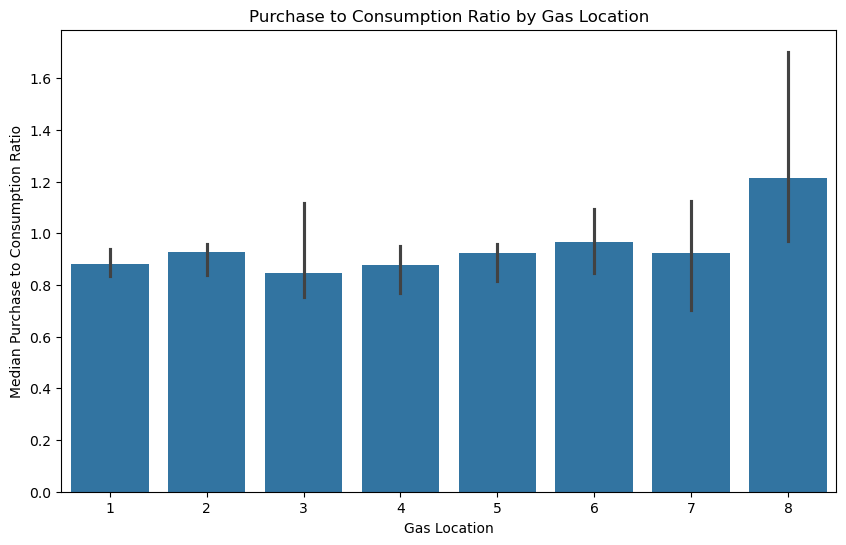

In [66]:
# Bar plot for Purchase to Consumption Ratio
plt.figure(figsize=(10, 6))
sns.barplot(x='Gas_Location', y='Purchase_Consumption_Ratio', data=merge_table, estimator=np.median)
plt.title('Purchase to Consumption Ratio by Gas Location')
plt.xlabel('Gas Location')
plt.ylabel('Median Purchase to Consumption Ratio')
plt.show()

In [67]:
purchase_consm_ratio = pd.DataFrame(merge_table.groupby(['Gas_Location'])['Purchase_Consumption_Ratio'].median())
purchase_consm_ratio.sort_values(by='Purchase_Consumption_Ratio',ascending=False
                                )

,Purchase_Consumption_Ratio
Gas_Location,
8,1.214174
6,0.965965
2,0.928853
7,0.925568
5,0.922671
1,0.881370
4,0.876876
3,0.848152


### 4.3 Consumption pattern overtime & relationship with purchasing

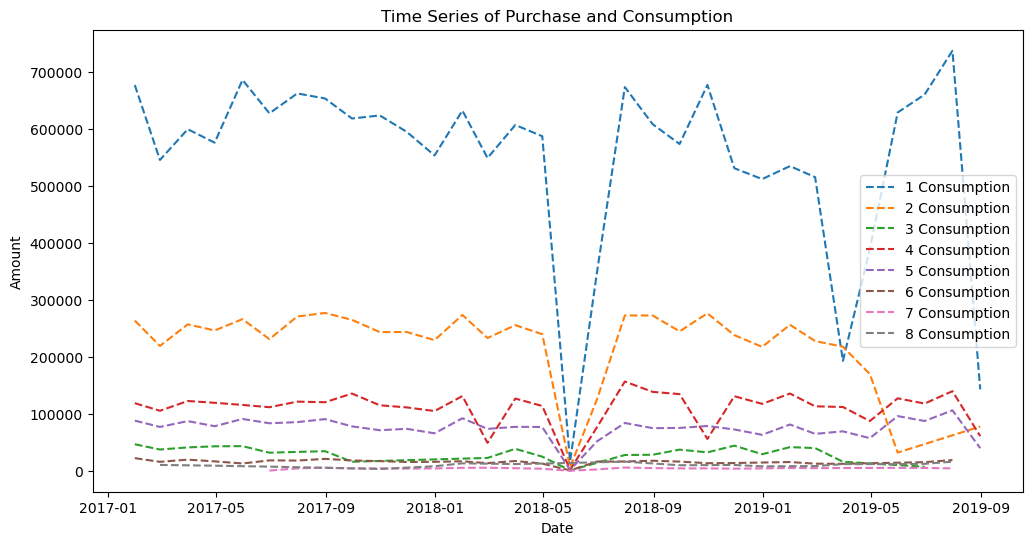

In [68]:
plt.figure(figsize=(12, 6))
for name, group in merge_table.groupby('Gas_Location'):
    plt.plot(group['Date'], group['Fuel_Consumption'], label=f"{name} Consumption", linestyle='--')
plt.legend()
plt.title('Time Series of Purchase and Consumption')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

### 4.3.1 Relationship between Consumption and Purchasing

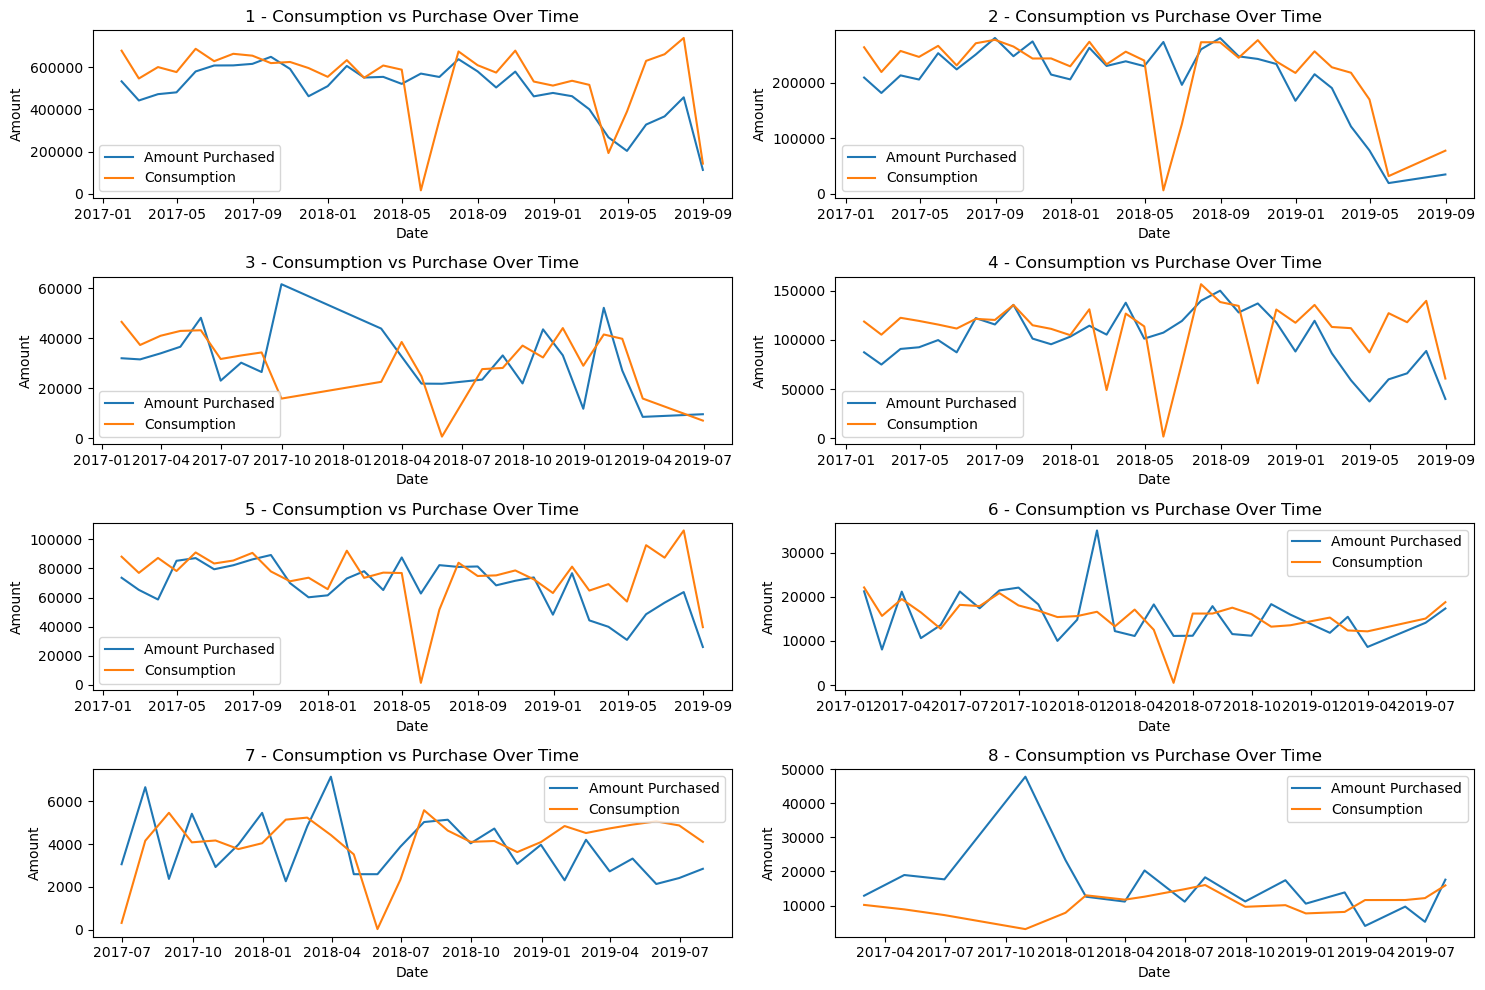

In [69]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

# Iterate through groups and corresponding subplot axes
for ax, (name, group) in zip(axes, merge_table.groupby('Gas_Location')):
    ax.plot(group['Date'], group['Amount Purchased'], label='Amount Purchased')
    ax.plot(group['Date'], group['Fuel_Consumption'], label='Consumption')
    ax.legend()
    ax.set_title(f'{name} - Consumption vs Purchase Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Amount')

# Hide remaining subplots if any (in case the number of groups is less than the total subplots)
for ax in axes[len(merge_table['Gas_Location'].unique()):]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

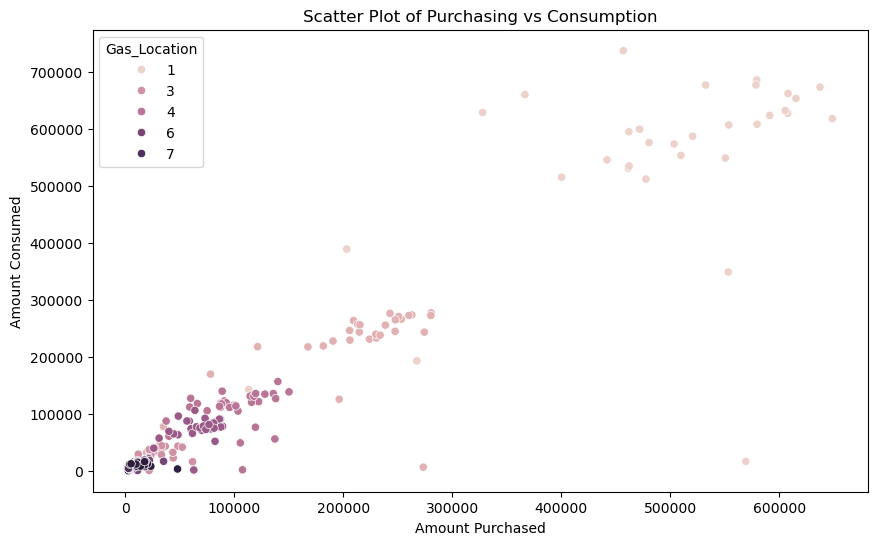

In [70]:
# Scattor plot of the Purchase amount and Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merge_table, x='Amount Purchased', y='Fuel_Consumption', hue='Gas_Location')
plt.title('Scatter Plot of Purchasing vs Consumption')
plt.xlabel('Amount Purchased')
plt.ylabel('Amount Consumed')
plt.show()

### 4.3.2 Relationship between Consumption and Replenishment 

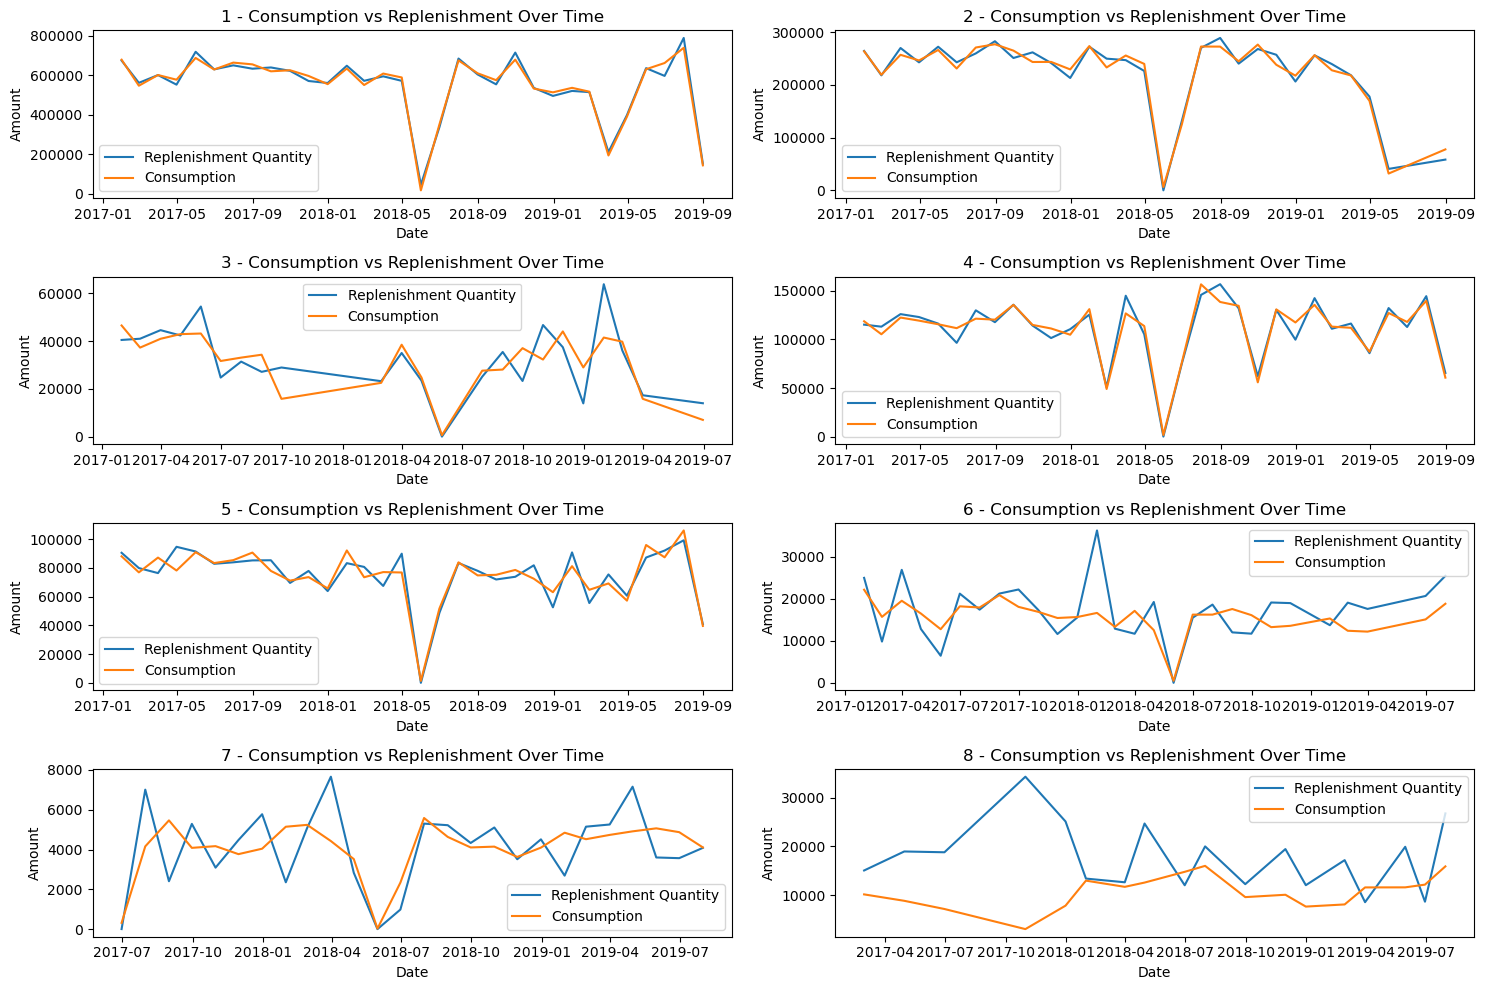

In [71]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

# Iterate through groups and corresponding subplot axes
for ax, (name, group) in zip(axes, merge_table.groupby('Gas_Location')):
    ax.plot(group['Date'], group['Rep_Quantity'], label='Replenishment Quantity')
    ax.plot(group['Date'], group['Fuel_Consumption'], label='Consumption')
    ax.legend()
    ax.set_title(f'{name} - Consumption vs Replenishment Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Amount')

# Hide remaining subplots if any (in case the number of groups is less than the total subplots)
for ax in axes[len(merge_table['Gas_Location'].unique()):]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### 4.4 Explore potential factors that could influence Cost 

### 4.4.1 Relationships of some key factors 

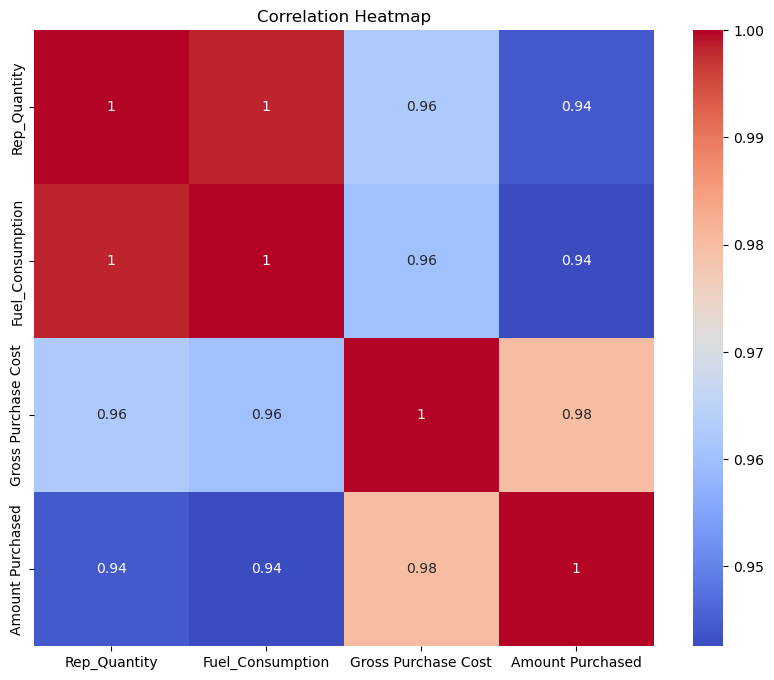

In [72]:
correlation_matrix = merge_table[['Rep_Quantity', 'Fuel_Consumption', 'Gross Purchase Cost', 'Amount Purchased']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 4.4.2 Regression Analysis

In [73]:
import statsmodels.api as sm

# Create an empty data frame to store regression variables 
summary_table = pd.DataFrame(columns=['Gas_Location', 'Variable', 'Coefficient', 'P_value', 'R_squared', 'Adj_R_squared'])

# create a loop to loop through data for each gas location to perform regression
for location in merge_table['Gas_Location'].unique():
    
    # data frame for each gas location 
    data_table = merge_table[merge_table['Gas_Location'] == location]
    
    # define our dependent and independent variablee
    y = data_table['Gross Purchase Cost']
    X = data_table[['Replenishment', 'Rep_Quantity']]
    
    # Add a constant to the regression 
    X = sm.add_constant(X)
    
    # Perform the regression analysis
    function = sm.OLS(y, X).fit()
    
    # Extract the relevant statistics
    coefficients = function.params
    p_values = function.pvalues
    r_squared = function.rsquared
    adj_r_squared = function.rsquared_adj
    
    # Append to the summary table
    for var, coef in coefficients.items():
        p_value = p_values[var]
        summary_table = summary_table._append({'Gas_Location': location, 'Variable': var, 'Coefficient': round(coef,2),
                                      'P_value': round(p_value,4), 'R_squared': r_squared, 'Adj_R_squared': adj_r_squared}, 
                                     ignore_index=True)


display(summary_table.set_index(['Gas_Location','Variable']))

/var/folders/n2/9fhj80rj4zvg22hr2kybq4d80000gn/T/ipykernel_56294/1887773152.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_table = summary_table._append({'Gas_Location': location, 'Variable': var, 'Coefficient': round(coef,2),


Coefficient  P_value  R_squared  Adj_R_squared
Gas_Location Variable                                                     
1            const            386807.61   0.0000   0.473856       0.437571
             Replenishment      -180.68   0.0860   0.473856       0.437571
             Rep_Quantity          0.54   0.0002   0.473856       0.437571
2            const            136431.41   0.0000   0.546079       0.512455
             Replenishment      -201.79   0.0300   0.546079       0.512455
             Rep_Quantity          0.73   0.0000   0.546079       0.512455
3            const             26806.99   0.0000   0.863729       0.850102
             Replenishment      -234.36   0.0000   0.863729       0.850102
             Rep_Quantity          0.88   0.0000   0.863729       0.850102
4            const             86919.14   0.0000   0.296304       0.247774
             Replenishment      -111.45   0.0976   0.296304       0.247774
             Rep_Quantity          0.36   0.0017   0.296304       0.247774
5            const             40924.71   0.0000   0.539066       0.507277
             Replenishment       -42.51   0.5260   0.539066       0.507277
             Rep_Quantity          0.56   0.0001   0.539066       0.507277
6            const              5940.91   0.0007   0.876607       0.866736
             Replenishment       -31.87   0.0434   0.876607       0.866736
             Rep_Quantity          0.87   0.0000   0.876607       0.866736
7            const              2522.74   0.0000   0.863256       0.851365
             Replenishment       -17.15   0.0005   0.863256       0.851365
             Rep_Quantity          0.80   0.0000   0.863256       0.851365
8            const             -1792.76   0.5227   0.911516       0.899718
             Replenishment       -14.34   0.0572   0.911516       0.899718
             Rep_Quantity          1.28   0.0000   0.911516       0.899718

In [74]:
summary_table.groupby(['Variable']).mean()

,Gas_Location,Coefficient,P_value,R_squared,Adj_R_squared
Variable,,,,,
Rep_Quantity,4.5,0.75250,0.000250,0.671302,0.646625
Replenishment,4.5,-104.26875,0.105088,0.671302,0.646625
const,4.5,85570.09375,0.065425,0.671302,0.646625


#### 4.2.2 Interpretation:

    - Replenishment frequency have negative impact on cost --> lower cost 
    - Replenishment quantity have positive impact on cost, but very small --> increase cost 
    - Replenishment frequency factor is statistically insignificant 
    - R^2 and adjusted R^2 is in acceptable range, but not very high. We still question the fitness of the model